# SC1015 DSAI Mini Project

By: Xie Xiaotian (U2430437J), Xie Xiaomei (U2430937E)

In [12]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [13]:
diabetesData = pd.read_csv('diabetes.csv')
diabetesData.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

### Diabetes Dataset: Column Descriptions and Domain Knowledge  

> #### 1. Gender  
> - Description: Biological sex of the individual.  
> - Categories: Male, Female, Other 
> - Domain Insight:  
>  - Men and women may exhibit different risk profiles for diabetes due to hormonal and lifestyle factors.  

> #### 2. Age  
> - Description: Age of the individual in years.  
> - Range: 0.08 (infant) to 80 (elderly).  
> - Domain Insight:  
  > - Diabetes risk increases with age, especially after 45 years.  
  > - Note: Infants with diabetes (min age = 0.08) may indicate rare Type 1 cases or data entry errors.  


> #### 3. Hypertension  
> - Description: Presence of high blood pressure.  
> - Encoding:  
  > - 0: Absent  
  > - 1: Present  
> - Domain Insight:  
  > - Hypertension is a comorbidity for diabetes; shared risk factors include obesity and poor diet.  


> #### 4. Heart Disease  
> - Description: Presence of cardiovascular conditions.  
> - Encoding:  
  > - 0: Absent  
  > - 1: Present  
> - Domain Insight:  
  > - Heart disease and diabetes often coexist due to shared metabolic dysfunctions.  


> #### 5. Smoking History  
> - Description: Self-reported smoking status.  
> - Categories:  
  > - never, former, current, ever, No Info  
> - Domain Insight:  
  > - Smoking exacerbates insulin resistance and diabetic complications.  


> #### 6. BMI (Body Mass Index)  
> - Description: Measure of body fat (`weight(kg)/height(m)^2`).  
> - Range: 10.16 (underweight) to 71.55 (severely obese).  
> - Clinical Thresholds:  
  > - <18.5: Underweight  
  > - 18.5–24.9: Normal  
  > - 25–29.9: Overweight  
  > - ≥30: Obese  
> - Domain Insight:  
  > - Higher BMI correlates with increased diabetes risk due to insulin resistance.  


> #### 7. HbA1c Level  
> - Description: Average blood glucose over 2–3 months (%).  
> - Range: 3.5% (normal) to 9.0% (poor control).  
> - Clinical Thresholds:  
  > - <5.7%: Normal  
  > - 5.7–6.4%: Prediabetes  
  > - ≥6.5%: Diabetes  
> - Domain Insight:  
  > - Gold standard for diagnosing and monitoring diabetes.  

> #### 8. Blood Glucose Level  
> - Description: Immediate blood glucose measurement (`mg/dL`).  
> - Range: 80 (normal) to 300 (hyperglycemic crisis).  
> - Clinical Thresholds:  
  > - Fasting: ≥126 mg/dL indicates diabetes.  
  > - Random: ≥200 mg/dL suggests diabetes.  


> #### 9. Diabetes (Target Variable)  
> - Description: Diagnosis of diabetes.  
> - Encoding:  
  > - 0: No diabetes  
  > - 1: Diabetes  
> - Domain Insight:  
  > - Predicted using risk factors like BMI, HbA1c, and glucose levels.

# Part 1: Data Cleaning

In this section of the project, we cleaned the dataset to better analyse our data and prepare it for use in machine learning in the later sections.

**Steps Taken**
- Drop duplicate rows  
- Choose relevant columns  
- Remove rows that had “Other” for gender  
- One-hot encode categorical data  

### Dropping Duplicate Rows

Duplicate rows can negatively impact the performance, accuracy, and interpretability of a machine learning model. Hence, we removed the duplicate rows in our dataset to:

- **Avoid Data Bias**: Duplicate entries can artificially inflate the importance of certain data points. This can bias the model toward overfitting on repeated examples and reduce generalization to new, unseen data.
- **Better Evaluation Metrics**: Duplicates can inflate performance metrics (like accuracy or recall) by repeating easy-to-predict instances. Removing them gives a more honest evaluation of model performance.

In [18]:
duplicate_rows_data = diabetesData[diabetesData.duplicated()]
print("no. of duplicate rows: ", duplicate_rows_data.shape)

no. of duplicate rows:  (3854, 9)


In [19]:
diabetesData = diabetesData.drop_duplicates()
diabetesData.shape

(96146, 9)

We dropped a total of 3854 rows, changing our dataset to a total of 96146 rows. 

Here, we printed the different columns in the dataset so that we can decide on which columns to select

In [22]:
for column in diabetesData.columns:
    num_distinct_values = len(diabetesData[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


We obeserved that there are 3 distinct values for gender, perhaps we need to do some data cleaning here

### Choosing Relevant Columns -- removing smoking history

Although smoking is recognized as a contributing factor to several chronic diseases, including type 2 diabetes, the `smoking_history` variable was excluded from the dataset for the following reasons:

- **Incomplete or Inconsistent Data**: The smoking history field contained a high percentage of missing, ambiguous, or inconsistently recorded entries. Including such data could introduce noise and reduce the reliability of the predictive model.
- **Scope and Focus**: The primary aim is to develop a model using features that are typically available in standard health screenings. In many basic medical checkups, smoking history is either self-reported or unavailable, making this variable less practical for general predictive use.

In [25]:
diabetesData = diabetesData.drop("smoking_history",axis=1)

**Checking for missing data**

In [27]:
diabetesData.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

There are no missing data in this dataset.

### Removing Specific Rows

A small number of records were labeled with "Other" as the gender. While it is important to be inclusive in data collection, these rows were removed due to the following:

- **Focus on Binary Gender Classification**: This particular study or model focuses on analyzing patterns across the two most represented gender groups (typically "Male" and "Female"). Including a third category with minimal data would not contribute meaningfully to this scope.
- **Avoiding Overfitting to Noise**: With very few "Other" entries, the model might learn patterns that are more reflective of noise or randomness rather than meaningful trends, leading to overfitting.

In [30]:
diabetesData = diabetesData[diabetesData['gender'] != 'Other']

In [31]:
for column in diabetesData.columns:
    num_distinct_values = len(diabetesData[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 2 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


**Covert each variable into a dataframe**

In [33]:
# predictor variables
gender = pd.DataFrame(diabetesData[["gender"]])
age = pd.DataFrame(diabetesData[["age"]])
hypertension = pd.DataFrame(diabetesData[["hypertension"]])
heart_disease = pd.DataFrame(diabetesData[["heart_disease"]])
bmi = pd.DataFrame(diabetesData[["bmi"]])
HbA1c_level = pd.DataFrame(diabetesData[["HbA1c_level"]])
glucose = pd.DataFrame(diabetesData[["blood_glucose_level"]])


# response variable
diabetes = pd.DataFrame(diabetesData[["diabetes"]])

In [34]:
gender.describe()

gender
count    96128
unique       2
top     Female
freq     56161

**Put all the numerical variable into a dataframe**

In [36]:
num_data = pd.concat([age, bmi, HbA1c_level, glucose], axis=1)
num_data.head()

age    bmi  HbA1c_level  blood_glucose_level
0  80.0  25.19          6.6                  140
1  54.0  27.32          6.6                   80
2  28.0  27.32          5.7                  158
3  36.0  23.45          5.0                  155
4  76.0  20.14          4.8                  155

### One-Hot Encoding for Categorical Data

One-hot encoding is a technique used to convert categorical variables into a numerical format without introducing unintended ordinal relationships.

In [38]:
from sklearn.preprocessing import OneHotEncoder
gender = diabetesData["gender"]

encoder = OneHotEncoder(sparse_output=False, drop="first") 

one_hot_encoded_gender = encoder.fit_transform(gender.to_numpy().reshape(-1, 1))

columns = [f"gender_{cat}" for cat in encoder.categories_[0][1:]] 
encoded_gender = pd.DataFrame(one_hot_encoded_gender, columns=columns)

diabetesData = diabetesData.drop(columns=["gender"]).reset_index(drop=True)

diabetesData = pd.concat([diabetesData, encoded_gender], axis=1)

print(diabetesData.head())


    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Male  
0         0          0.0  
1         0          0.0  
2         0          1.0  
3         0          0.0  
4         0          1.0  


In [39]:
gender_Male=pd.DataFrame(diabetesData[["gender_Male"]])

# Part 2: Exploratory Data Analysis

In [41]:
diabetesData.shape

(96128, 8)

In [42]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96128 entries, 0 to 96127
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  96128 non-null  float64
 1   hypertension         96128 non-null  int64  
 2   heart_disease        96128 non-null  int64  
 3   bmi                  96128 non-null  float64
 4   HbA1c_level          96128 non-null  float64
 5   blood_glucose_level  96128 non-null  int64  
 6   diabetes             96128 non-null  int64  
 7   gender_Male          96128 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 5.9 MB


In [43]:
diabetesData.describe()

age  hypertension  heart_disease           bmi   HbA1c_level  \
count  96128.000000  96128.000000   96128.000000  96128.000000  96128.000000   
mean      41.796617      0.077615       0.040810     27.321450      5.532633   
std       22.463329      0.267567       0.197851      6.767811      1.073225   
min        0.080000      0.000000       0.000000     10.010000      3.500000   
25%       24.000000      0.000000       0.000000     23.400000      4.800000   
50%       43.000000      0.000000       0.000000     27.320000      5.800000   
75%       59.000000      0.000000       0.000000     29.860000      6.200000   
max       80.000000      1.000000       1.000000     95.690000      9.000000   

       blood_glucose_level      diabetes   gender_Male  
count         96128.000000  96128.000000  96128.000000  
mean            138.218001      0.088237      0.415769  
std              40.911190      0.283640      0.492857  
min              80.000000      0.000000      0.000000  
25%             100.000000      0.000000      0.000000  
50%             140.000000      0.000000      0.000000  
75%             159.000000      0.000000      1.000000  
max             300.000000      1.000000      1.000000

## Initial Observation

* Our dataset has 96,128 rows but the response variable (diabetes) has a mean of 0.088237 which is around 8.8 percent, meaning only 8.8 percent of the patients have diabetes.
    * There is a class imbalance alert and hence we may require resampling
    * We may need to evaluate using F1, precision and recall and not just accuracy

## Univariate Data Analysis

We will perform Univariate Data Analysis on 
1. diabetes (response variable)
2. age, bmi, HbA1c_level, glucose (numeric predictors)
3. gender, hypertension, heart_disease (categorical predictors)

### 1. Univariate Data Analysis -- diabetes (response variable)

In [47]:
sb.catplot(y = "diabetes", data = diabetesData, kind = "count")

In [48]:
countY, countX = diabetesData.diabetes.value_counts()
print("Ratio of classes is 0 : 1 = ", countY, ":", countX)

Ratio of classes is 0 : 1 =  87646 : 8482


### 2. Univariate Data Analysis -- age, bmi, HbA1c_level, glucose (numeric predictors)

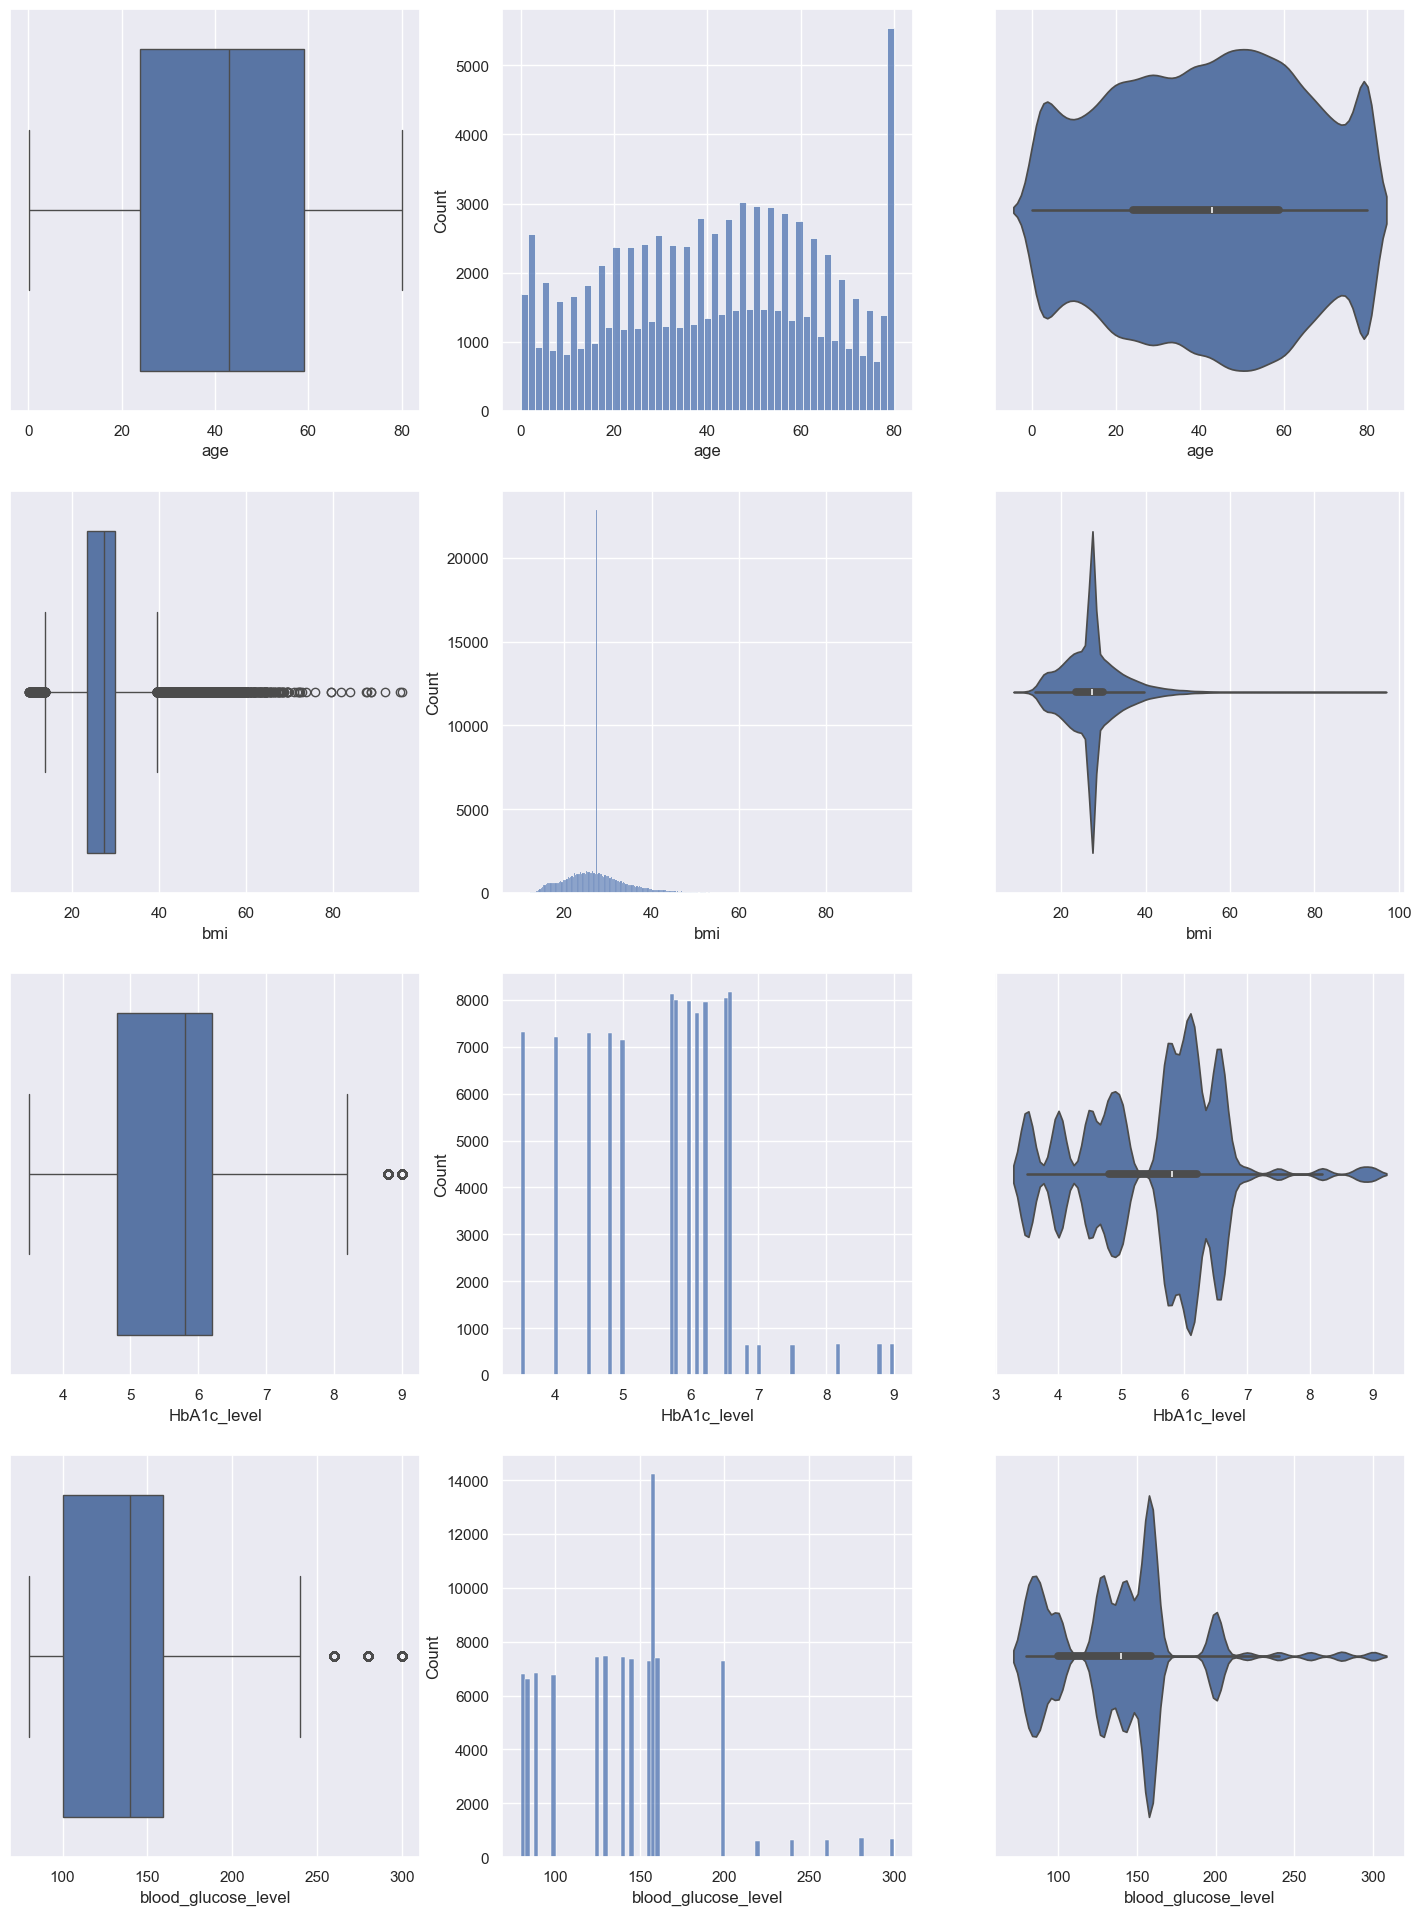

In [50]:
f, axes = plt.subplots(4, 3, figsize=(18, 24))

count = 0
for var in num_data:
    sb.boxplot(data = num_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = num_data[var], ax = axes[count,1])
    sb.violinplot(data = num_data[var], orient = "h", ax = axes[count,2])
    count += 1

#### Observation

1. Age:
    * Boxplot: The age distribution is fairly symmetric with no extreme outliers. The median age lies around 40, with a range from about 0 to 80 years.
    * Histogram: The distribution is relatively uniform across ages, but with **a spike at age 80**
    * Violin Plot: Consistent with the boxplot: symmetric distribution centered around middle age

2. BMI:
    * Boxplot: The BMI variable contains a **high number of outliers** on the right
    * Histogram: Shows a **large spike around 21** which expected because this is in the range of healthy bmi in adults
    * Violin Plot: The distribution is **highly right-skewed** with a sharp peak near the mean and a long tail of high BMI values.

3. HbA1c_level:
    * Boxplot: The central tendency is around **5.5–6.0**, with a mild spread. A few values above 8 appear as **outliers**, which may indicate high-risk diabetic cases.
    * Histogram: The data appears discretised
    * Violin Plot: A large bulk of the distribution centers around 5.5–6.5.

4. blood_glucose_level:
    * Boxplot: Median around **140–150**, but the data shows **significant right skew**. There exist some outliers
    * Histogram: Extremely **spiky distribution** but with a obvious mode at around 150
    * Violin Plot: confirms the histogram

#### Handling Outliers
In this project, we decided not to remove outliers from the dataset due to their potential significance in a medical context. Below are the main reasons:

##### 1. Outliers May Represent Rare but Critical Cases
- **Medical relevance**: Outliers could indicate severe or high-risk conditions (e.g., extremely high blood glucose levels) that are important for early diagnosis and intervention.
- **Legitimate values**: In healthcare, some extreme values reflect real, clinically important situations. Removing them could result in a model that overlooks serious conditions.

##### 2. Outliers Can Improve Model Robustness
- **Real-world variability**: Outliers capture the natural range of variation in real patient data. Keeping them helps the model generalize to diverse, unseen cases.
- **Avoiding overfitting**: Removing outliers may cause the model to overfit to typical cases, reducing its effectiveness in identifying rare but important patterns.

##### 3. Domain-Specific Importance
- **Medical knowledge matters**: Some outliers—like young individuals diagnosed with diabetes or patients with very high BMI—may seem unusual but offer valuable insights. These data points could reveal important medical trends that shouldn't be ignored.


### 3. Univariate Data Analysis -- gender_Male, hypertension, heart_disease (categorical predictors)

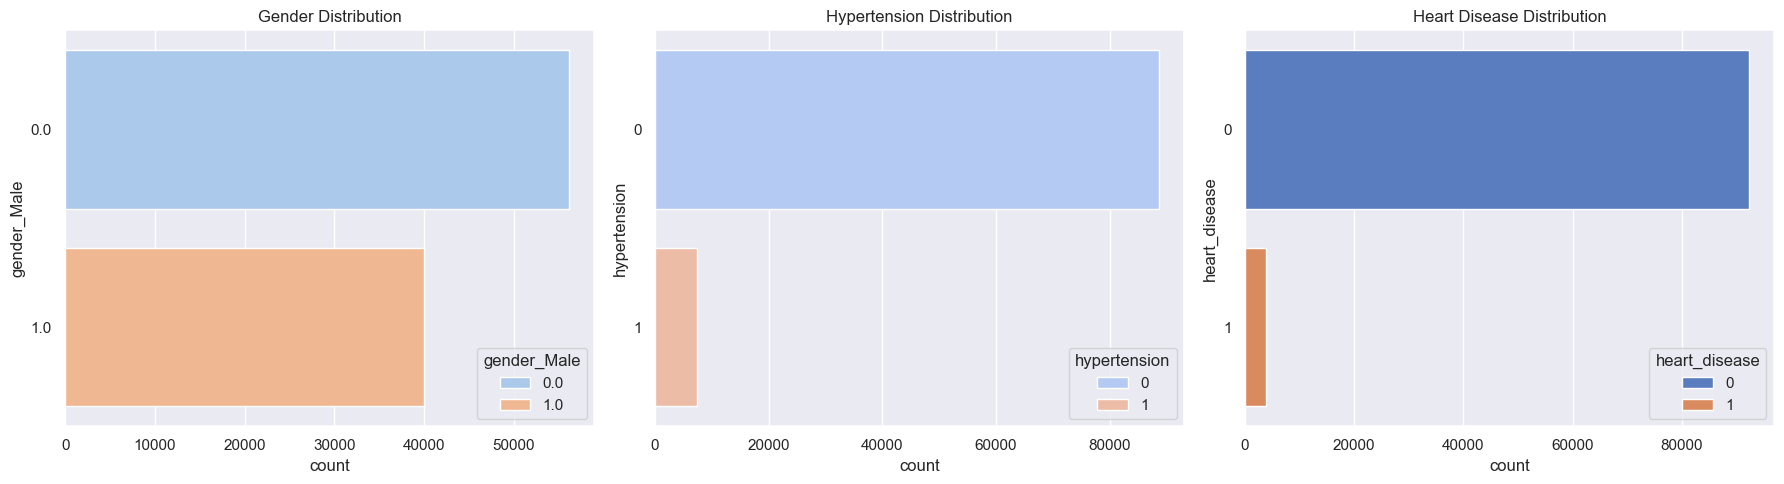

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

# Gender Count Plot
sb.countplot(y="gender_Male", data=diabetesData, hue="gender_Male", palette="pastel", ax=axes[0])
axes[0].set_title("Gender Distribution")

# Hypertension Count Plot
sb.countplot(y="hypertension", data=diabetesData, hue="hypertension", palette="coolwarm", ax=axes[1])
axes[1].set_title("Hypertension Distribution")

# Heart Disease Count Plot
sb.countplot(y="heart_disease", data=diabetesData, hue="heart_disease", palette="muted", ax=axes[2])
axes[2].set_title("Heart Disease Distribution")

plt.tight_layout()
plt.show()

In [55]:
female, male = diabetesData.gender_Male.value_counts()
hypertension, nohypertension = diabetesData.hypertension.value_counts()
heartdisease, noheartdisease = diabetesData.heart_disease.value_counts()
print("Ratio of classes is female : male = ", female, ":", male)
print("Ratio of classes is hypertension : no hypertension = ", hypertension, ":", nohypertension)
print("Ratio of classes is heart disease : no heart disease = ", heartdisease, ":", noheartdisease)

Ratio of classes is female : male =  56161 : 39967
Ratio of classes is hypertension : no hypertension =  88667 : 7461
Ratio of classes is heart disease : no heart disease =  92205 : 3923


## Bivariate Data Analysis
1. Bivariate Data Analysis -- age, bmi, HbA1c_level, glucose (numeric predictors) with diabetes(response)
    * age and diabetes
    * bmi and diabetes
    * HbA1c_level and diabetes
    * glucose and diabetes
2. Bivariate Data Analysis -- gender_Male, hypertension, heart_disease (categorical predictors) with diabetes(response)
    * gender_Male and diabetes
    * hypertension and diabetes
    * heart_disease and diabetes

### 1. Bivariate Data Analysis -- age, bmi, HbA1c_level, glucose (numeric predictors) with diabetes(response)

### 1.1 age and diabetes

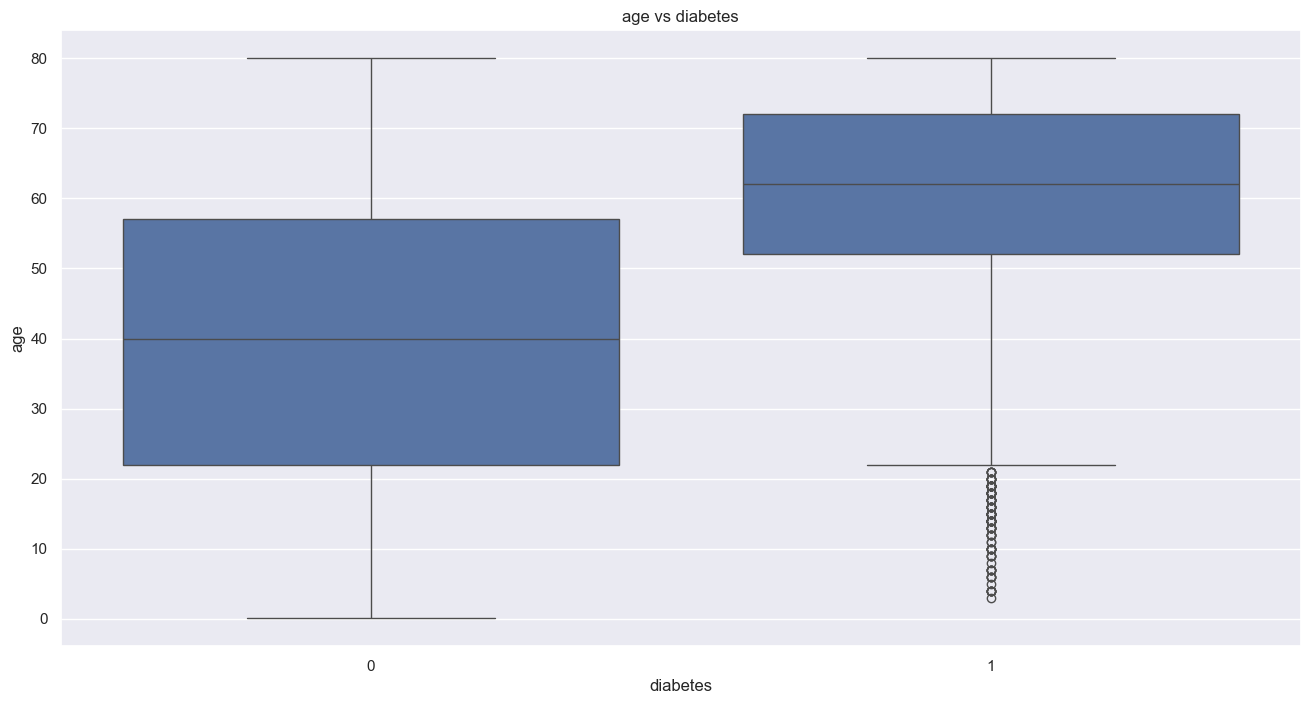

In [59]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x='diabetes', y='age', data=diabetesData)
plt.title('age vs diabetes')
plt.show()

#### Observations:
1. Diabetes = 0 (Non-diabetic group):
   - The age distribution is more spread out.
   - The median age is approximately 40 years.
   - The interquartile range (IQR) spans from around 22 to 58 years.
   - There are no significant outliers visible.

2. Diabetes = 1 (Diabetic group):
   - The median age is notably higher, around 63 years.
   - The IQR is more compressed but shifted towards older ages (**~53 to 73 years**).
   - Numerous outliers appear on the lower end, indicating that while diabetes is more common in older individuals, there are younger outliers with diabetes as well (e.g., teens or early 20s).

#### Insights:
- There is a clear relationship between age and diabetes—older individuals are more likely to have diabetes.
- The presence of young individuals with diabetes (outliers) might warrant further investigation (e.g., type 1 diabetes or genetic factors).
- From  the boxplot, we can see that the median and variation of the data is different for when diabetes = 0 and when diabetes = 1. This shows that the age affects diabetes and would hence be an important factor in predicting whether someone has diabetes

### 1.2 bmi and diabetes

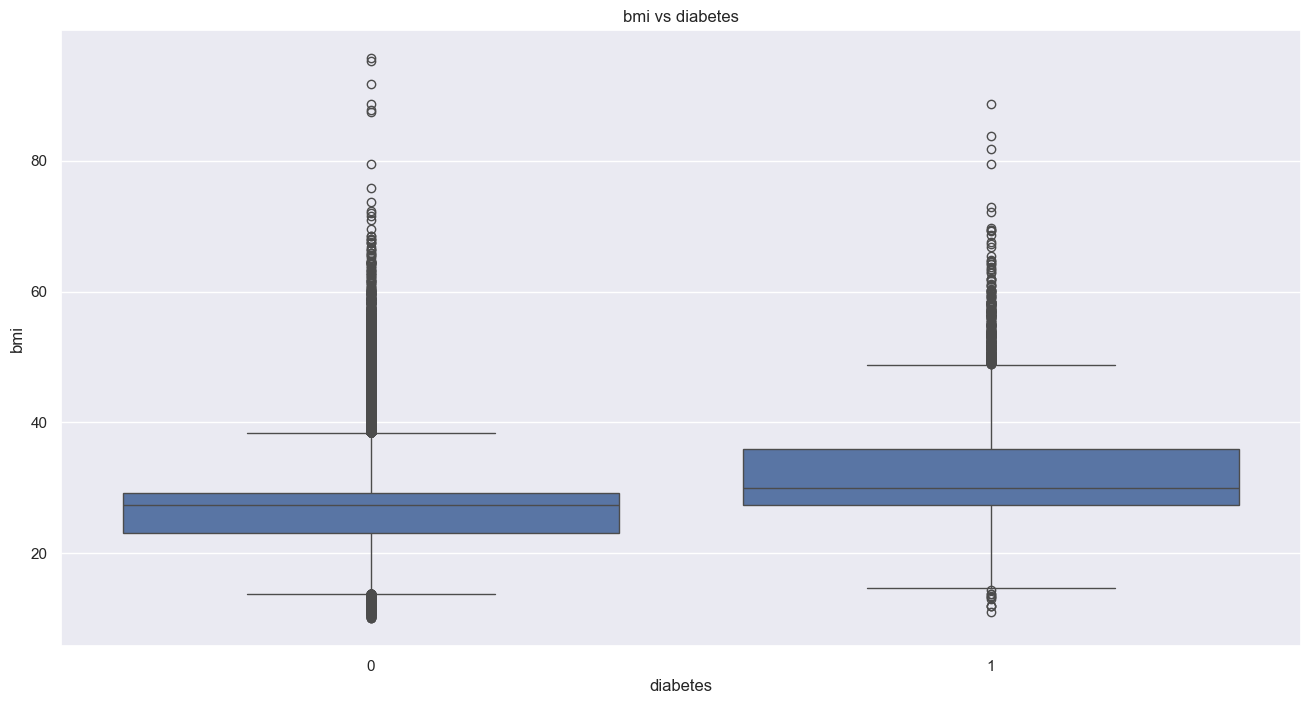

In [62]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x='diabetes', y='bmi', data=diabetesData)
plt.title('bmi vs diabetes')
plt.show()

#### Observations:
1. Diabetes = 0 (Non-diabetic group):
   - The median BMI is around 27.
   - The interquartile range (IQR) roughly spans from ~23 to ~31.
   - There are many outliers on the higher end, with BMI values even exceeding 80, suggesting a long right tail.

2. Diabetes = 1 (Diabetic group):
   - The median BMI is slightly higher, approximately 30.
   - The IQR appears to range from ~26 to ~36.
   - This group also exhibits numerous high-BMI outliers, more densely clustered than in the non-diabetic group.

#### Insights:
- Individuals with diabetes tend to have a higher BMI than those without, with the entire distribution shifted upward.
- The presence of extreme BMI outliers in both groups, but especially in the diabetic group, suggests a potential correlation between obesity and diabetes risk.
- BMI is likely a strong predictor for diabetes in any modeling or diagnostic effort.
- From  the boxplot, we can see that the median and variation of the data is different for when diabetes = 0 and when diabetes = 1. This shows that the bmi affects diabetes and would hence be an important factor in predicting whether someone has diabetes

### 1.3 HbA1c_level and diabetes

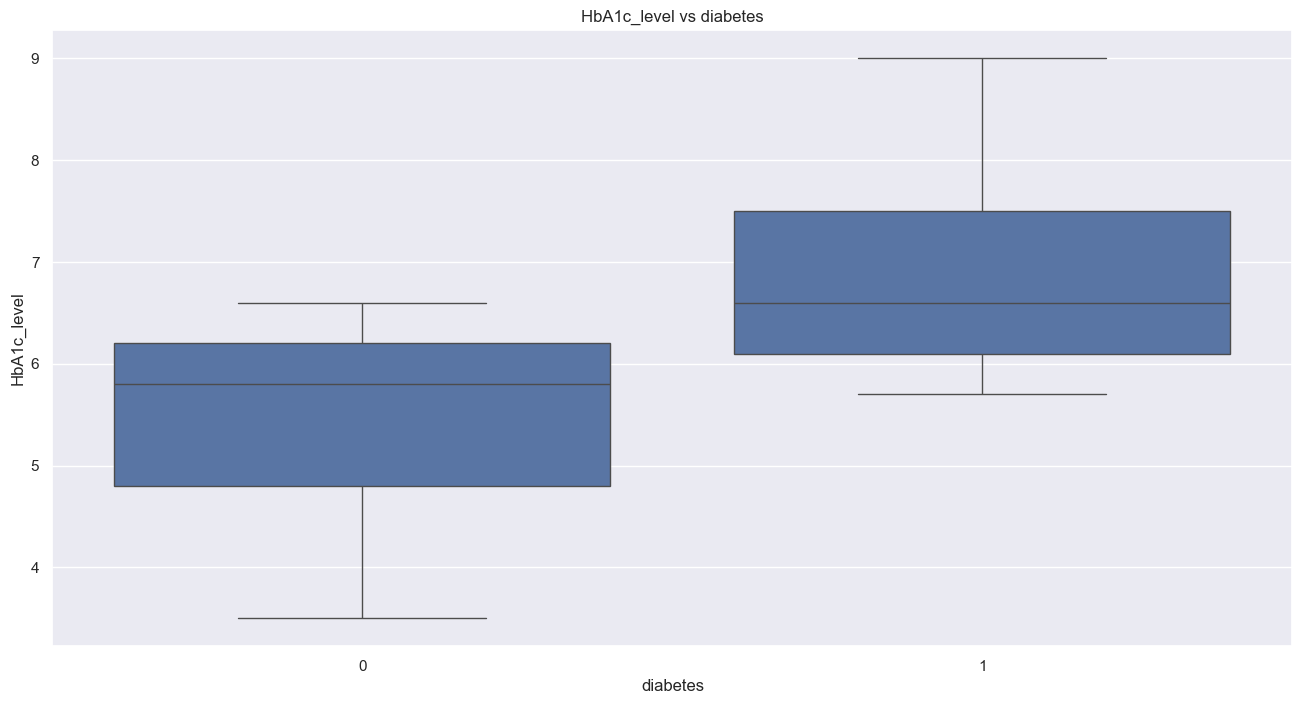

In [65]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x='diabetes', y='HbA1c_level', data=diabetesData)
plt.title('HbA1c_level vs diabetes')
plt.show()

#### Observations:

1. Diabetes = 0 (Non-diabetic group):
  - Median HbA1c level is approximately 5.8%.
  - Interquartile range (IQR) spans from around 4.8% to 6.3%.
  - There is less variability in HbA1c levels, and the values are mostly within the non-diabetic range.

2. Diabetes = 1 (Diabetic group):
  - Median HbA1c level is higher, around 6.7%.
  - The IQR is wider, ranging from approximately 6.1% to 7.8%, with some values going as high as 9%.
  - This indicates a higher and more variable HbA1c level, consistent with diabetic individuals.

#### Insights:
- Clear separation is observed between the two groups in terms of HbA1c levels.
- Individuals with diabetes have consistently higher HbA1c levels, as expected.
- From  the boxplot, we can see that the median and variation of the data is different for when diabetes = 0 and when diabetes = 1. This shows that the HbA1c_level affects diabetes and would hence be an important factor in predicting whether someone has diabetes

### 1.4 glucose and diabetes 

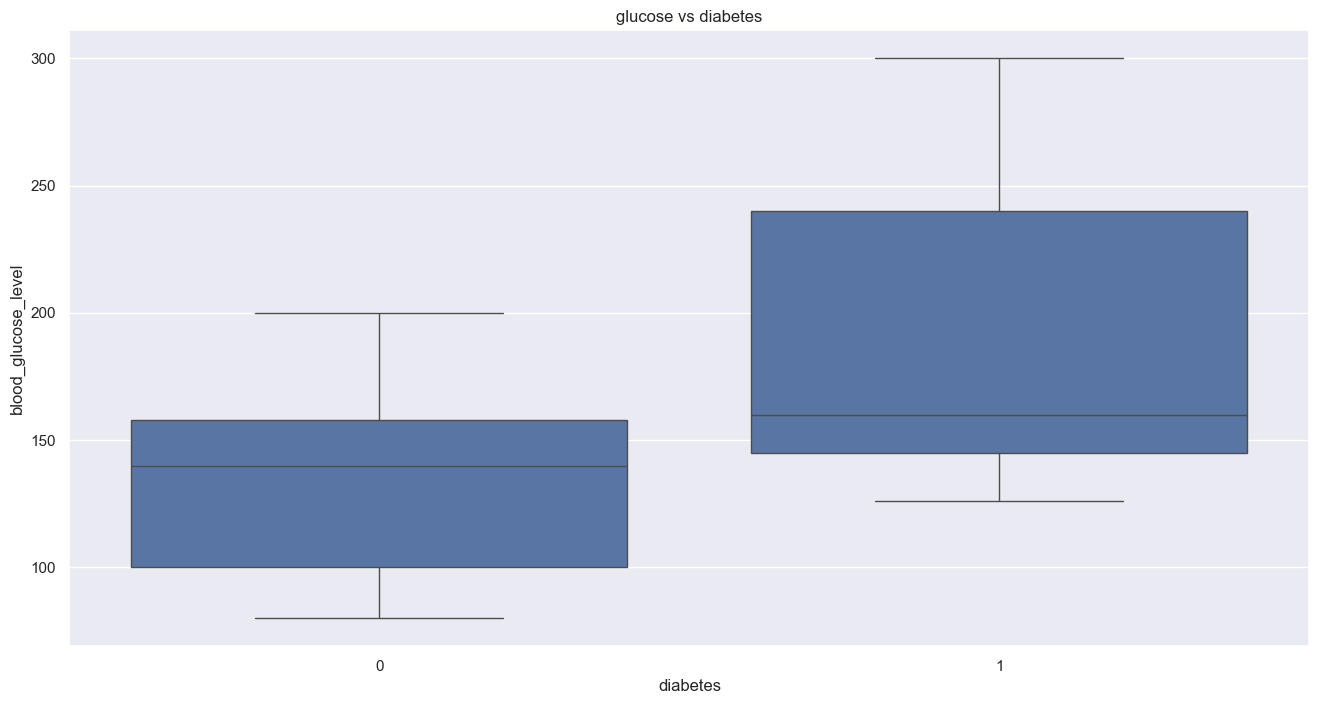

In [68]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x='diabetes', y="blood_glucose_level" , data=diabetesData)
plt.title('glucose vs diabetes')
plt.show()

#### Observations:
1. Diabetes = 0 (Non-diabetic group):
   - The median blood glucose level is approximately 140 mg/dL.
   - The interquartile range (IQR) spans from around 100 to 160 mg/dL.
   - There are a few moderate outliers, but overall the distribution is fairly compact compared to the diabetic group.

2. Diabetes = 1 (Diabetic group):
   - The median blood glucose level is slightly higher, roughly 165 mg/dL.
   - The IQR ranges widely, from about 145 to 250 mg/dL.
   - This group has significantly higher maximum values, reaching up to 300 mg/dL, indicating a much broader and skewed distribution.

#### Insights:
- Individuals with diabetes tend to have a higher and more variable blood glucose level.
- The diabetic group exhibits a broader range and higher upper extremes, which aligns with clinical expectations.
- Blood glucose level appears to be a strong and direct indicator of diabetes status and could be a valuable feature in predictive modeling.

## 2. Bivariate Data Analysis -- gender, hypertension, heart_disease (categorical predictors) with diabetes(response)**

### 2.1 gender_Male and diabetes

In [72]:
pd.crosstab(diabetesData['gender_Male'], diabetesData['diabetes'])

diabetes         0     1
gender_Male             
0.0          51714  4447
1.0          35932  4035

In [73]:
# Normalize by hypertension status (column-wise percentages)
ct = pd.crosstab(diabetesData['gender_Male'], diabetesData['diabetes'], normalize="index") * 100
print(ct)

diabetes             0          1
gender_Male                      
0.0          92.081694   7.918306
1.0          89.904171  10.095829


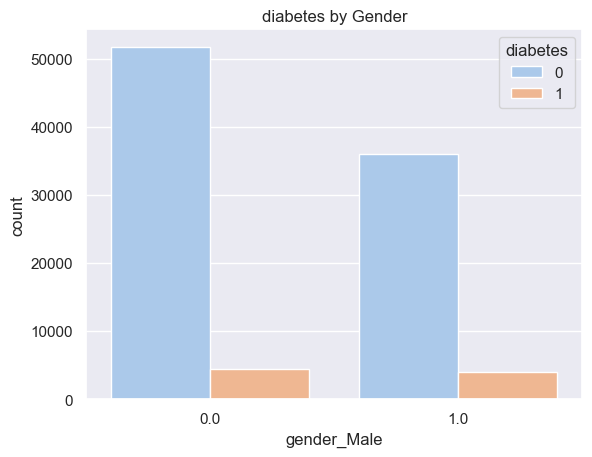

In [74]:
sb.countplot(data=diabetesData, x="gender_Male", hue="diabetes", palette="pastel")
plt.title("diabetes by Gender")
plt.show()

<Axes: xlabel='diabetes', ylabel='gender_Male'>

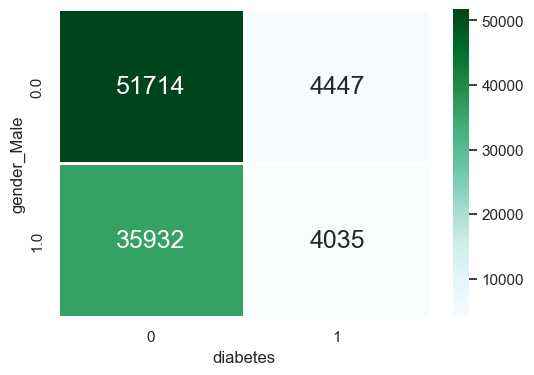

In [75]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(diabetesData.groupby(['gender_Male', 'diabetes']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

#### Key Observations

- Although more females are present in the dataset, the **rate of diabetes among males is slightly higher** than among females.
- This suggests a **potential association between gender and diabetes risk**, with **males having a relatively higher likelihood** of being diabetic.

#### Supporting Stats (from calculation above):

- **Female (gender_Male = 0):**  
  Diabetes rate = 7.9%

- **Male (gender_Male = 1):**  
  Diabetes rate = 10.1%

#### Conclusion

While diabetes is more prevalent in absolute terms among females due to their higher representation in the dataset, the **proportion of diabetic individuals is higher among males**. Gender may therefore be a relevant feature in predicting diabetes risk.


### 2.2 hypertension and diabetes

In [78]:
pd.crosstab(diabetesData['hypertension'], diabetesData['diabetes'])

diabetes          0     1
hypertension             
0             82271  6396
1              5375  2086

In [79]:
ct = pd.crosstab(diabetesData['hypertension'], diabetesData['diabetes'], normalize="index") * 100
print(ct)

diabetes              0          1
hypertension                      
0             92.786493   7.213507
1             72.041281  27.958719


**Interpretation:**
* If hypertension = 1, and 27.96% also have diabetes, that suggests a moderately strong link.
* If hypertension = 0, and only 7.21% have diabetes, that suggests a weak link.

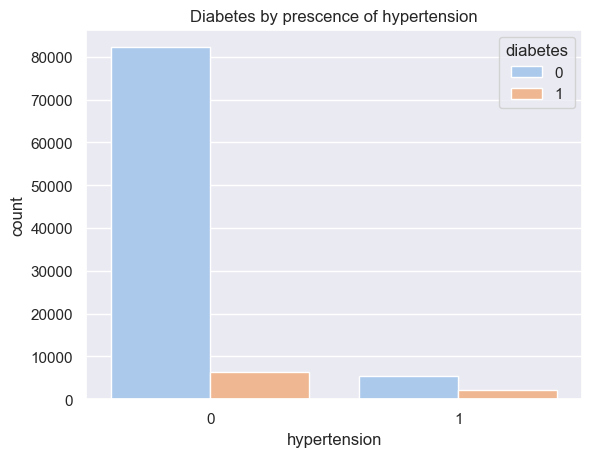

In [81]:
sb.countplot(data=diabetesData, x="hypertension", hue="diabetes", palette="pastel")
plt.title("Diabetes by prescence of hypertension")
plt.show()

<Axes: xlabel='diabetes', ylabel='hypertension'>

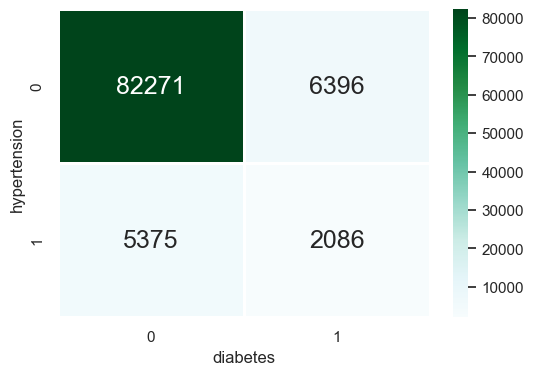

In [82]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(diabetesData.groupby(['hypertension', 'diabetes']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

#### Key Observations

- Individuals with hypertension make up a smaller portion of the dataset, yet the proportion of diabetes cases is noticeably higher within this group.
- This indicates a potential association between hypertension and increased diabetes risk.

#### Supporting Stats (from calculation above):

- **No Hypertension (hypertension = 0):**  
  Diabetes rate = 7.2%

- **With Hypertension (hypertension = 1):**  
  Diabetes rate = 27.9%

#### Conclusion

While most individuals with diabetes do **not** have hypertension (due to group size), the **likelihood of diabetes is significantly higher among those with hypertension**.  
This makes hypertension a strong candidate variable when modeling diabetes risk.

### 2.3 Heart disease and diabetes

In [85]:
pd.crosstab(diabetesData['heart_disease'], diabetesData['diabetes'])

diabetes           0     1
heart_disease             
0              84990  7215
1               2656  1267

In [86]:
ct = pd.crosstab(diabetesData['heart_disease'], diabetesData['diabetes'], normalize="index") * 100
print(ct)

diabetes               0          1
heart_disease                      
0              92.175045   7.824955
1              67.703288  32.296712


**Interpretation:**
* If heart_disease = 1, and 32.30% also have diabetes, that suggests a moderately strong link.
* If heart_disease = 0, and only 7.82% have diabetes, that suggests a weak link.

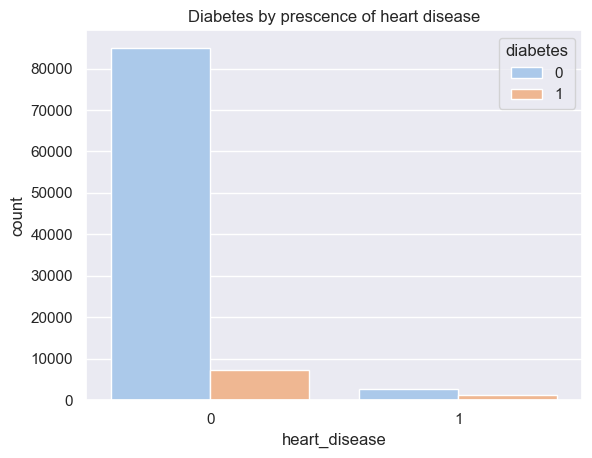

In [88]:
sb.countplot(data=diabetesData, x="heart_disease", hue="diabetes", palette="pastel")
plt.title("Diabetes by prescence of heart disease")
plt.show()

<Axes: xlabel='diabetes', ylabel='heart_disease'>

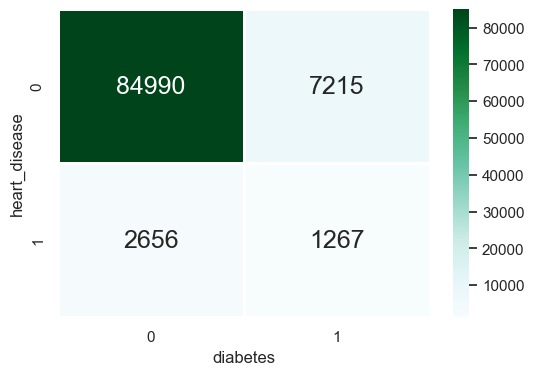

In [89]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(diabetesData.groupby(['heart_disease', 'diabetes']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

#### Key Observations

- The **number of individuals with heart disease is significantly lower** than those without.
- However, the **rate of diabetes among individuals with heart disease is noticeably higher**.
- This suggests a **potential link between heart disease and increased diabetes risk**.

#### Supporting Stats (from calculation above):

- **Without Heart Disease (heart_disease = 0):**  
  Diabetes rate = 7.8%

- **With Heart Disease (heart_disease = 1):**  
  Diabetes rate = 32.3%

#### Conclusion

Although most individuals in the dataset do not have heart disease, those who do show a **much higher proportion of diabetes cases**. This reinforces the **association between cardiovascular conditions and diabetes prevalence**.


## Multivariate Data Analysis

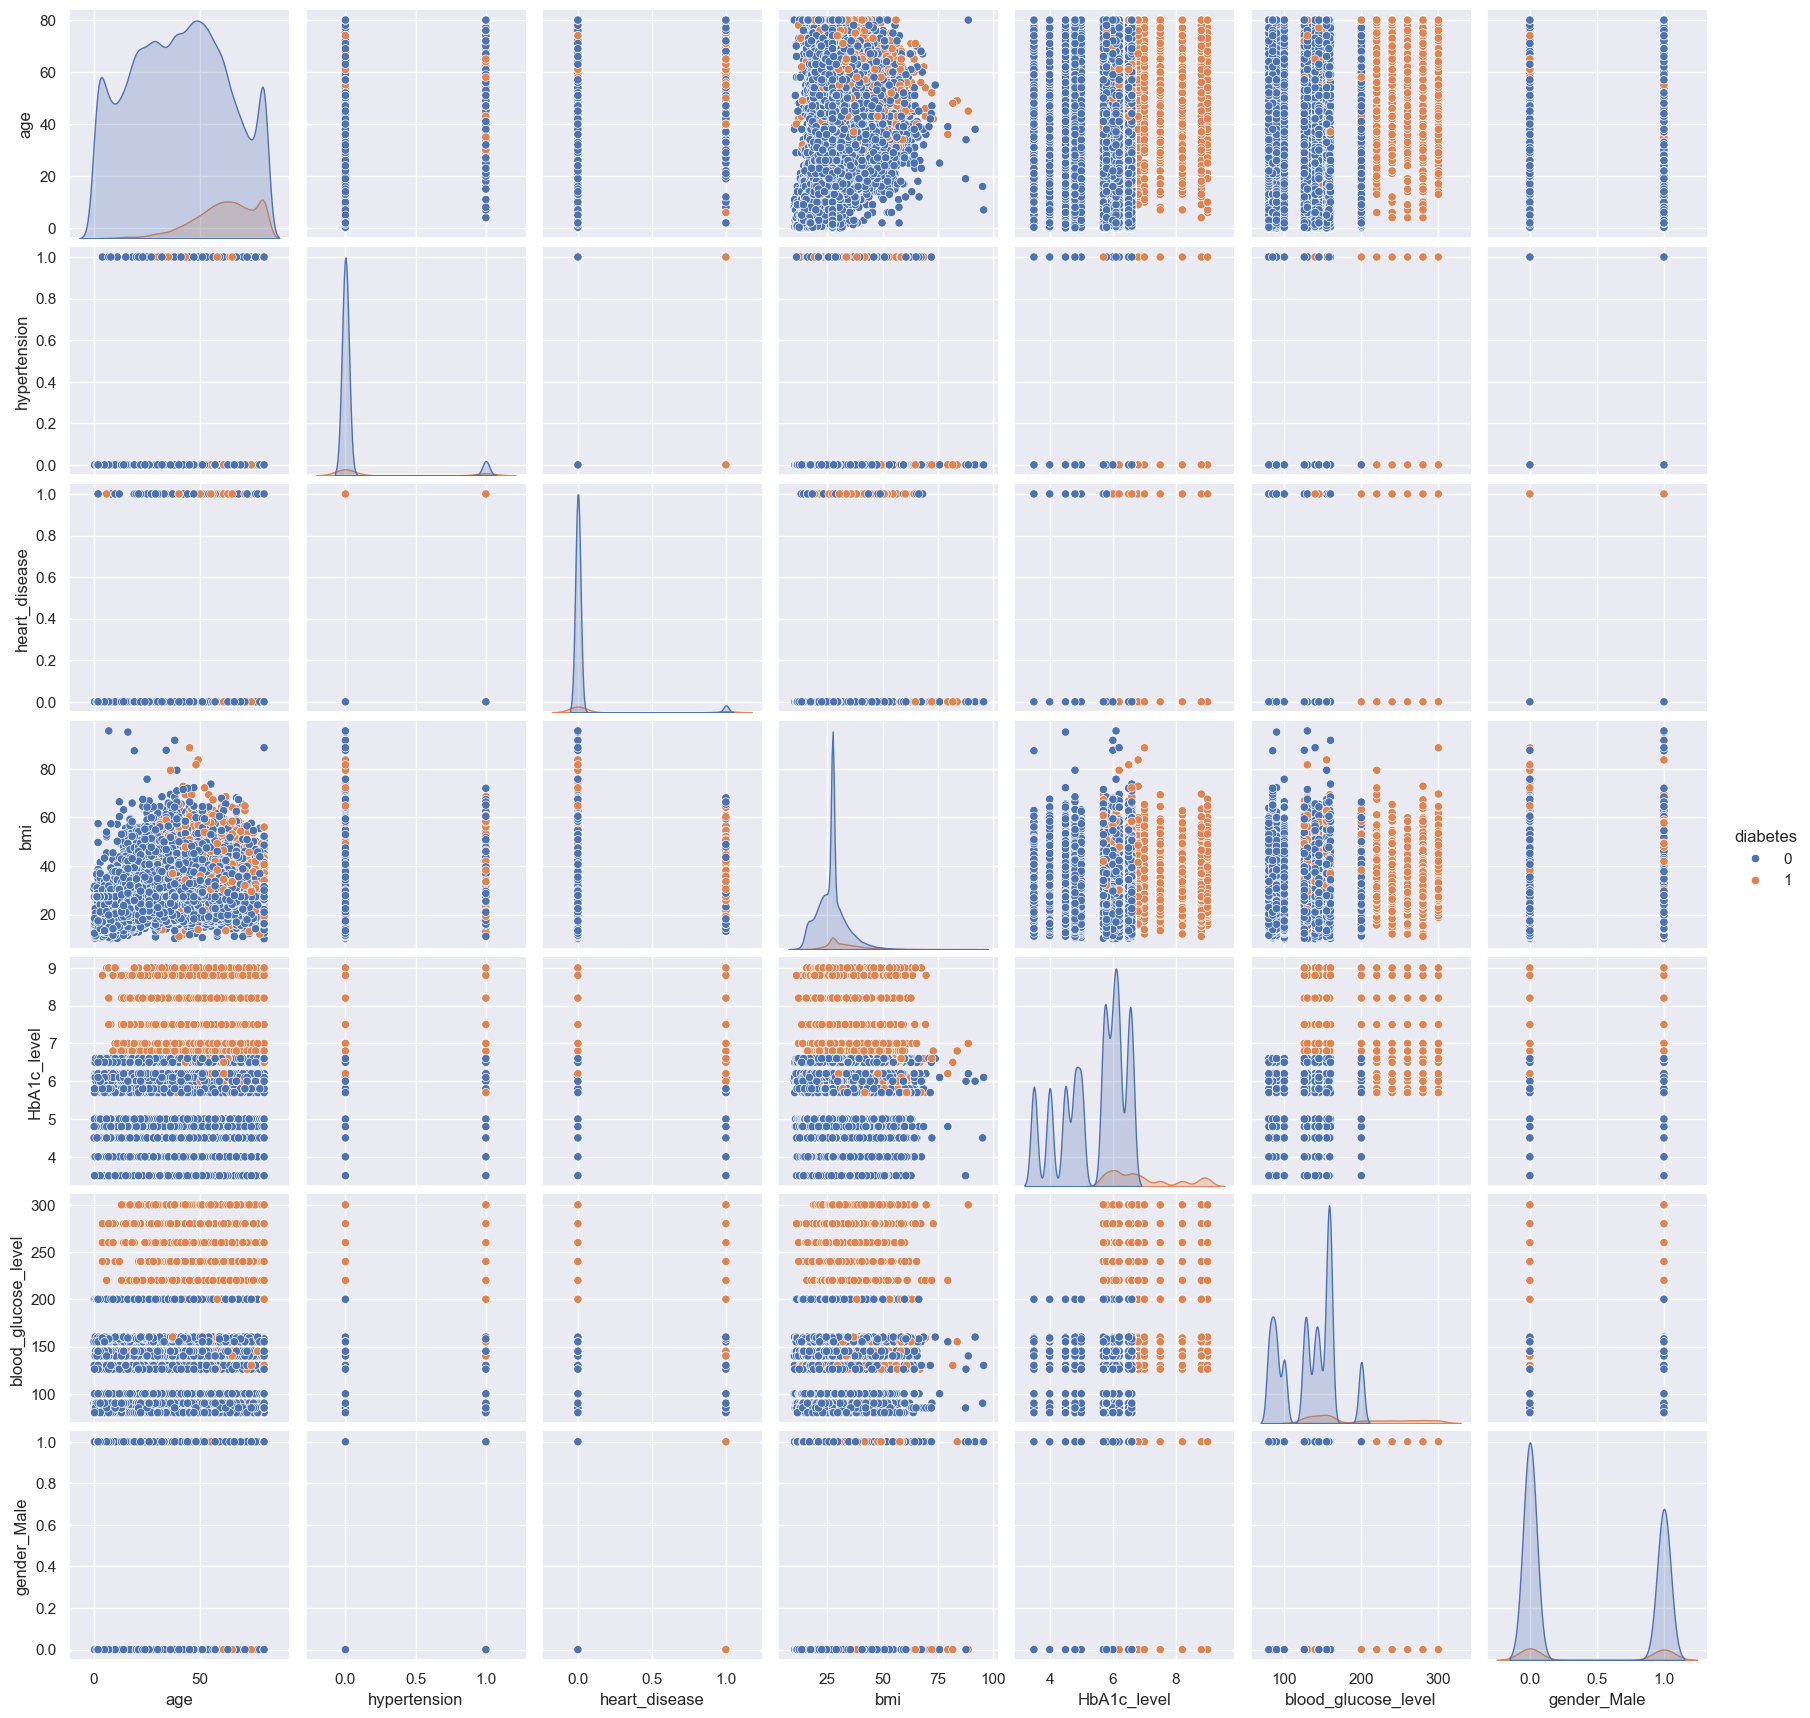

In [92]:
sb.pairplot(diabetesData, hue = "diabetes")
plt.show()

### Observations
(a) Relationship between Age and Diabetes

* The density plot on the diagonal suggests that older individuals are more likely to be diagnosed with diabetes (orange points).
* Younger individuals (lower age range) are mostly in the "non-diabetic" category (blue points).

(b) BMI vs. Diabetes
* There is a wide range of BMI values for both diabetic and non-diabetic individuals.
* Higher BMI seems slightly correlated with diabetes, but there is a significant overlap.
* Some low-BMI individuals also have diabetes, suggesting BMI alone is not a strong predictor.

(c) HbA1c Level vs. Diabetes
* Clear separation: Higher HbA1c levels are more associated with diabetes (orange).
* Non-diabetic individuals tend to have lower HbA1c levels.

(d) Blood Glucose Level vs. Diabetes
* Higher blood glucose levels are strongly associated with diabetes.
* Diabetic individuals (orange) have a higher blood glucose range.
* Non-diabetic individuals mostly have lower blood glucose levels.

3. Correlations and Patterns
* Blood Glucose & HbA1c: A strong positive relationship is visible. High HbA1c tends to align with high blood glucose.
* Age & Diabetes: Older individuals have a higher likelihood of being diabetic.
* BMI & Diabetes: There is a mild correlation, but it is not as strong as blood glucose or HbA1c.

### Multivariate analysis -- Correlation Matrix

In [95]:
correlation_matrix = diabetesData.corr()


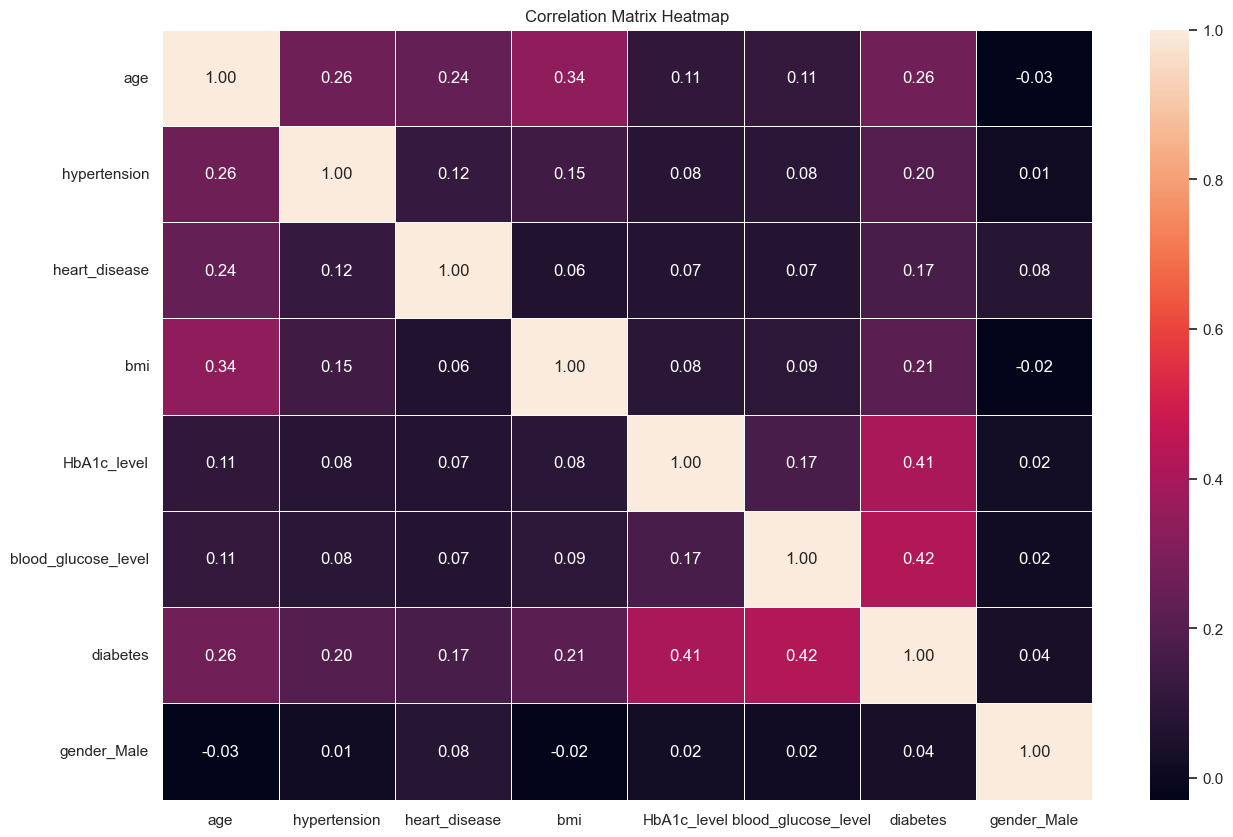

In [96]:
plt.figure(figsize=(15, 10))
sb.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

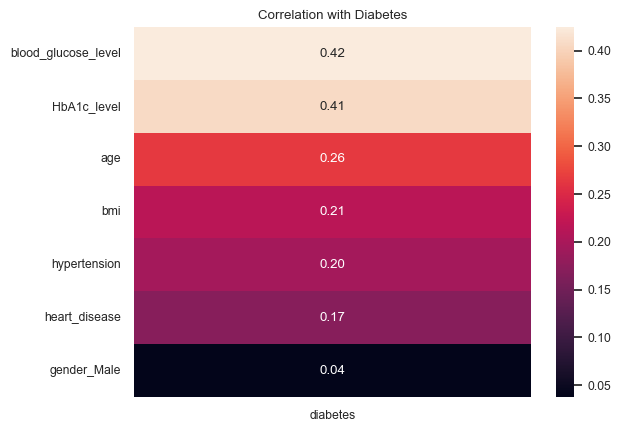

In [97]:
# Create a heatmap of the correlations with the target column
corr = diabetesData.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sb.set(font_scale=0.8)
sb.set_style("white")
sb.set_palette("PuBuGn_d")
sb.heatmap(target_corr_sorted.to_frame(), annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

#### Interpretation of results

* **blood_glucose_level (0.42)** : Moderate positive correlation — likely a strong predictor.
* **HbA1c_level	(0.41)** : Also moderately positively correlated
* **age	(0.26)**: Mild correlation. Diabetes becomes more common with age.
* **bmi	(0.21)**: Mild correlation. Overweight/obesity increases risk 
* **hypertension (0.20)**: Mild correlation 
* **heart_disease (0.17)**: weak correlation — not very strong but possibly helpful.
* **gender_Male	(0.04)**: Negligible correlation — gender doesn’t significantly affect diabetes in your data.

Hence, overall, blood_glucose_level and HbA1c_level should be prioritized during prediction as they are most strongly correlated to diabetes.

# Part 3: Data Preparation

In [100]:
percentage = diabetes["diabetes"].value_counts(normalize=True) * 100
print(percentage)

diabetes
0    91.176348
1     8.823652
Name: proportion, dtype: float64


In [101]:
diabetes.value_counts()

diabetes
0           87646
1            8482
Name: count, dtype: int64

Given the imbalanced nature of the dataset with only 8.82% positive cases for diabetes and 91.18% negative case, it is crucial to balance the data to prevent the model from being biased towards the majority class. 

To overcome this issue, we apply SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority class and RandomUndersampler to reduce the size of the majority class. This ensures that the model has an equal opportunity to learn from both classes. By balancing the classes, we enable the model to generalize better and improve its ability to predict the minority class without being overwhelmed by the majority class.

## Splitting the dataset into train and test data

In [104]:
from sklearn.model_selection import train_test_split

X = diabetesData.drop(columns=["diabetes"])  
y = diabetesData["diabetes"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print(f"Original class distribution in the training set:\n{y_train.value_counts()}")

Original class distribution in the training set:
diabetes
0    70121
1     6781
Name: count, dtype: int64


## Resampling of train data: SMOTE and RandomUndersampler

In [106]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

smote = SMOTE(sampling_strategy=0.3, random_state=42)  # Oversample minority class to 30% of majority class
under = RandomUnderSampler(sampling_strategy=0.7, random_state=42)  # Undersample majority class to 70% of original size

pipeline = Pipeline(steps=[('smote', smote), ('under', under)])

X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

print(f"Original training set size: {X_train.shape[0]}")
print(f"Resampled training set size: {X_train_resampled.shape[0]}")
print(f"Resampled class distribution:\n{y_train_resampled.value_counts()}")

Original training set size: 76902
Resampled training set size: 51087
Resampled class distribution:
diabetes
0    30051
1    21036
Name: count, dtype: int64


We only resample the training data because it's used to help the model learn, especially in cases of class imbalance. Resampling the test data would distort its natural distribution, leading to misleading performance metrics. Since the test set is meant to represent real-world, unseen data, altering it would make our evaluation unreliable. To ensure a fair and unbiased assessment of the model’s generalization, we leave the test data untouched.


# Part 4: Machine Learning
**Workflow**
1. Train and evaluate models with default hyperparameters. For evaluation, use the metrics mentioned below:
    * Multi-variate Classification Tree
    * Random Forest
    * Logistic Regression

**Evaluation metrics**
* Confusion matrix
* Accuracy
* Precision
    * Avoid false alarms
    * It is a measure of how many of the positive predictions were actually correct.
    * It is defined as the **number of true positives (TP) divided by the sum of true positives (TP) and false positives (FP)**
    * The higher the value, the better it is
* Recall
    * Catch most actual cases
    * Recall is a measure of how many of the actual positive cases were identified correctly.
    * It is defined as the **number of true positives (TP) divided by the sum of true positives (TP) and false negatives (FN).**
    * The higher the value, the better it is
* F1
    * Balances Precision and Recall
    * The F1 score is the harmonic mean of Precision and Recall and tries to find the balance between precision and recall.
    * It is defined as **2 times the product of precision and recall divided by the sum of precision and recall.**
    * The closer the value to 1, the better it is

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

## 1. Train models with default hyperparameters

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

### Creating a model: Attempt 1 -- Multi-variate Classification Tree (with default hyperparameters)
Multi-variate Classification Tree with all 7 predictors and diabetes as the response variable

In [113]:
from sklearn.tree import plot_tree

dt_model = DecisionTreeClassifier(random_state=42, max_depth= 5, class_weight = 'balanced')  
dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

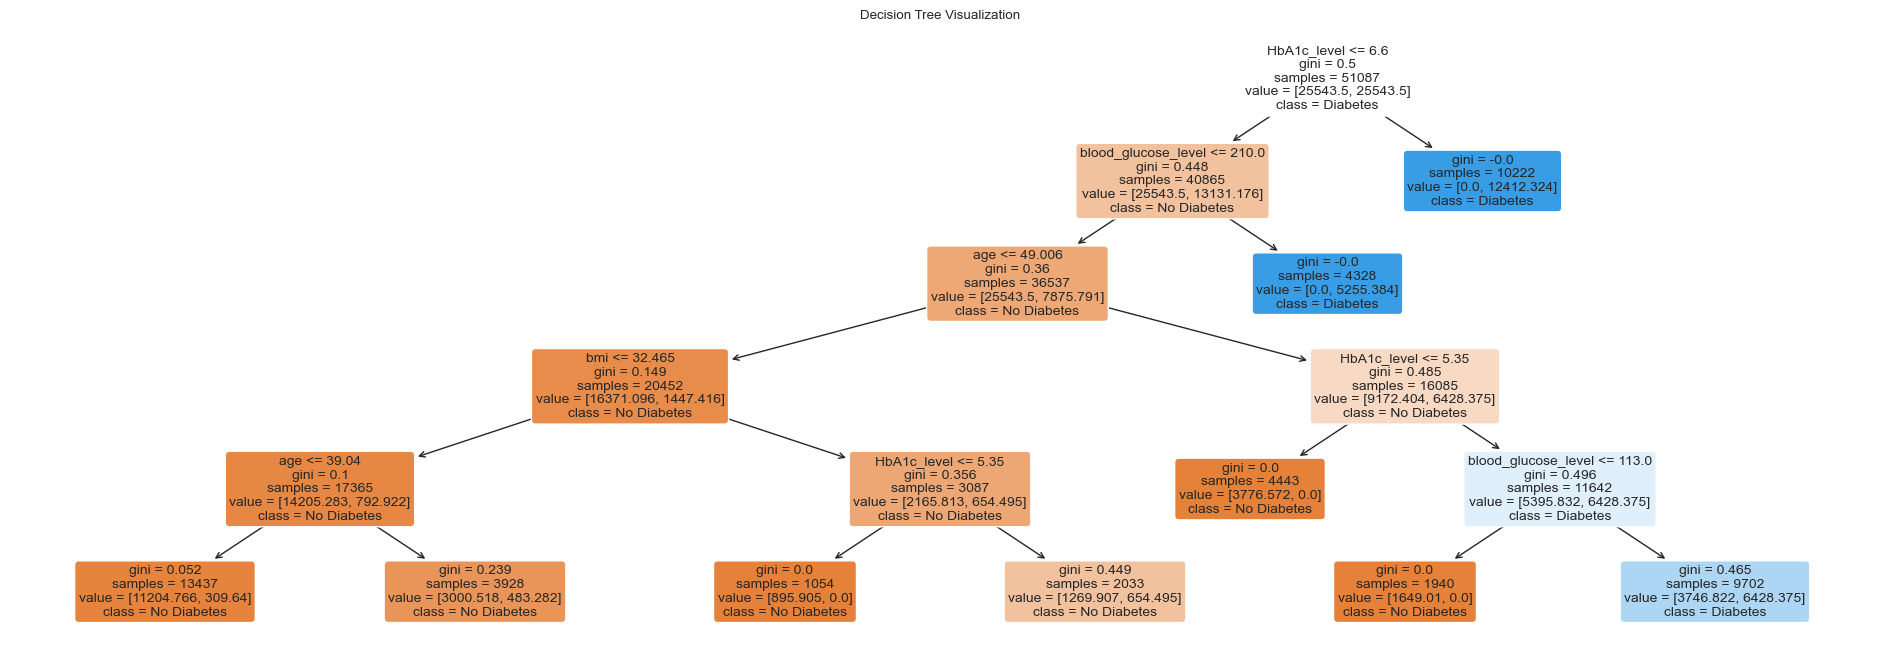

In [114]:
y_train_pred= dt_model.predict(X_train_resampled)
plt.figure(figsize=(24, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

Train Data
Accuracy  :	 0.8903830720144068

TPR Train :	 0.9433352348355201
TNR Train :	 0.8533160294166583

FPR Train :	 0.14668397058334165
FNR Train :	 0.05666476516447994


<Axes: >

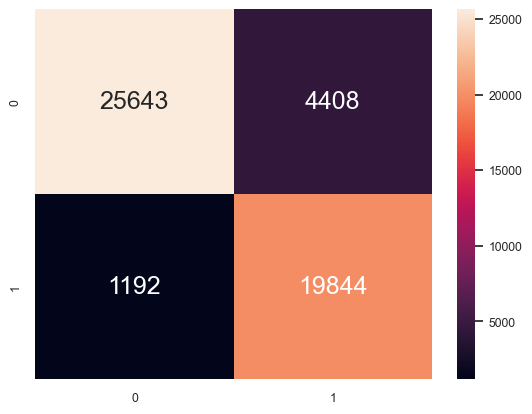

In [115]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dt_model.score(X_train_resampled, y_train_resampled))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train_resampled, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train_resampled, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


In [116]:
print("Precision :\t", precision_score(y_train_resampled, y_train_pred))
print("Recall    :\t", recall_score(y_train_resampled, y_train_pred))
print("F1 Score  :\t", f1_score(y_train_resampled, y_train_pred))

Precision :	 0.818241794491176
Recall    :	 0.9433352348355201
F1 Score  :	 0.8763469351704646


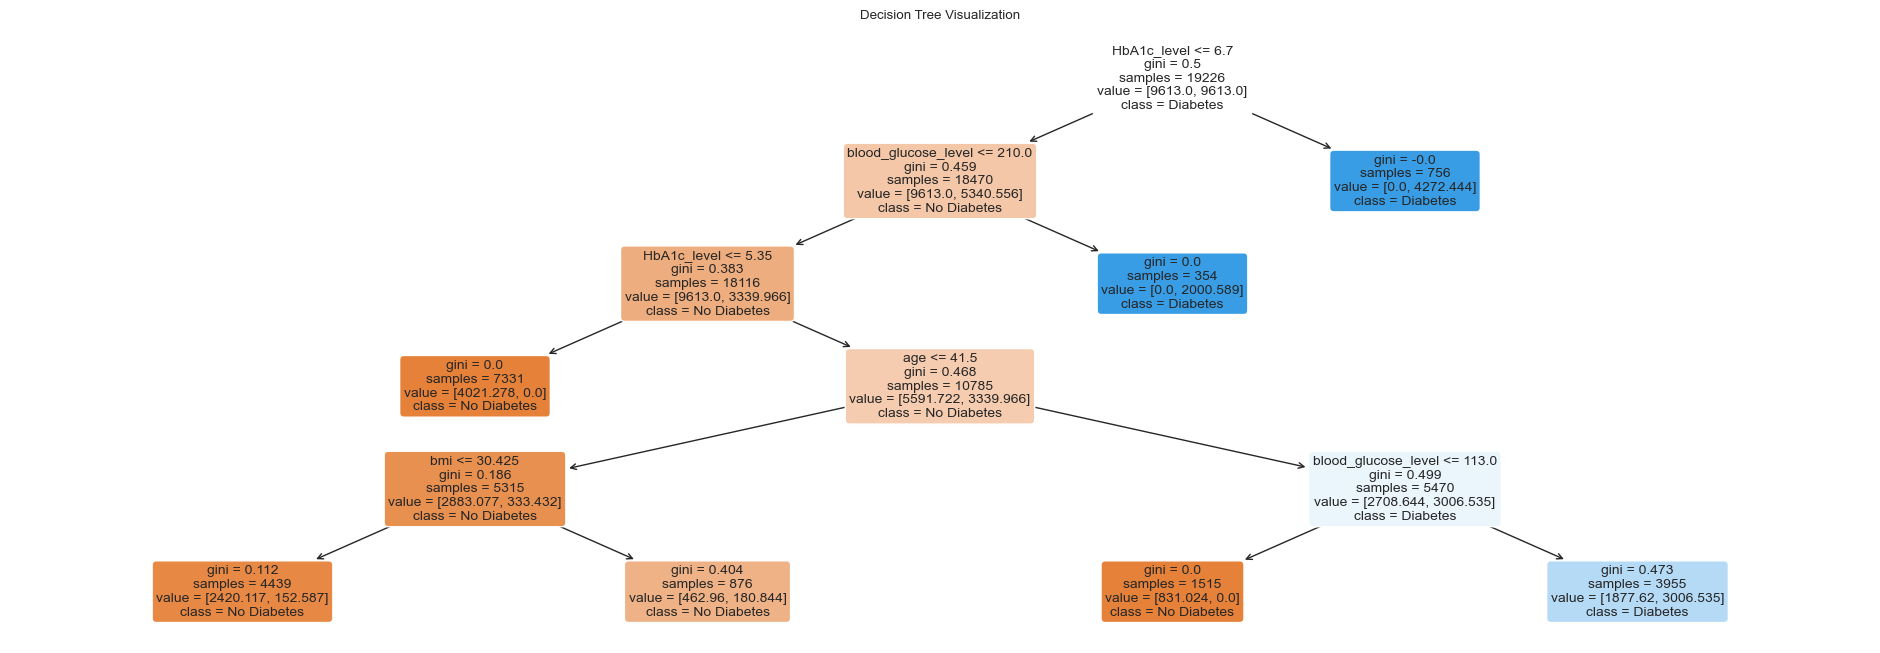

Test Data
Accuracy  :	 0.8188910849890773

TPR Test :	 0.9653145208700764
TNR Test :	 0.804679029957204

FPR Test :	 0.195320970042796
FNR Test :	 0.03468547912992358


<Axes: >

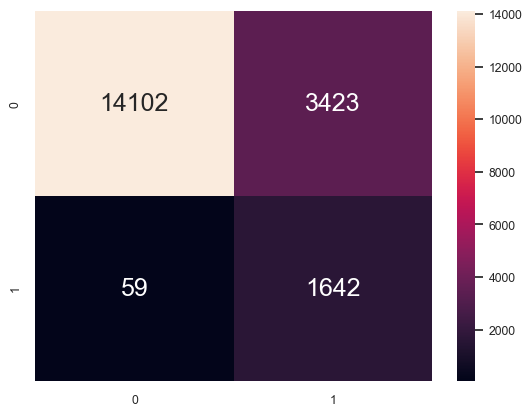

In [117]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth= 5, class_weight = 'balanced')  # Limit depth to prevent overfitting
dt_model.fit(X_test, y_test)

y_test_pred= dt_model.predict(X_test)
plt.figure(figsize=(24, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# Predict the Response corresponding to Predictors
y_test_pred = dt_model.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dt_model.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [118]:
print("Precision :\t", precision_score(y_test, y_test_pred))
print("Recall    :\t", recall_score(y_test, y_test_pred))
print("F1 Score  :\t", f1_score(y_test, y_test_pred))

Precision :	 0.32418558736426456
Recall    :	 0.9653145208700764
F1 Score  :	 0.485368016553355


### Creating a model: Attempt 2 -- RandomForest (with default hyperparameters)

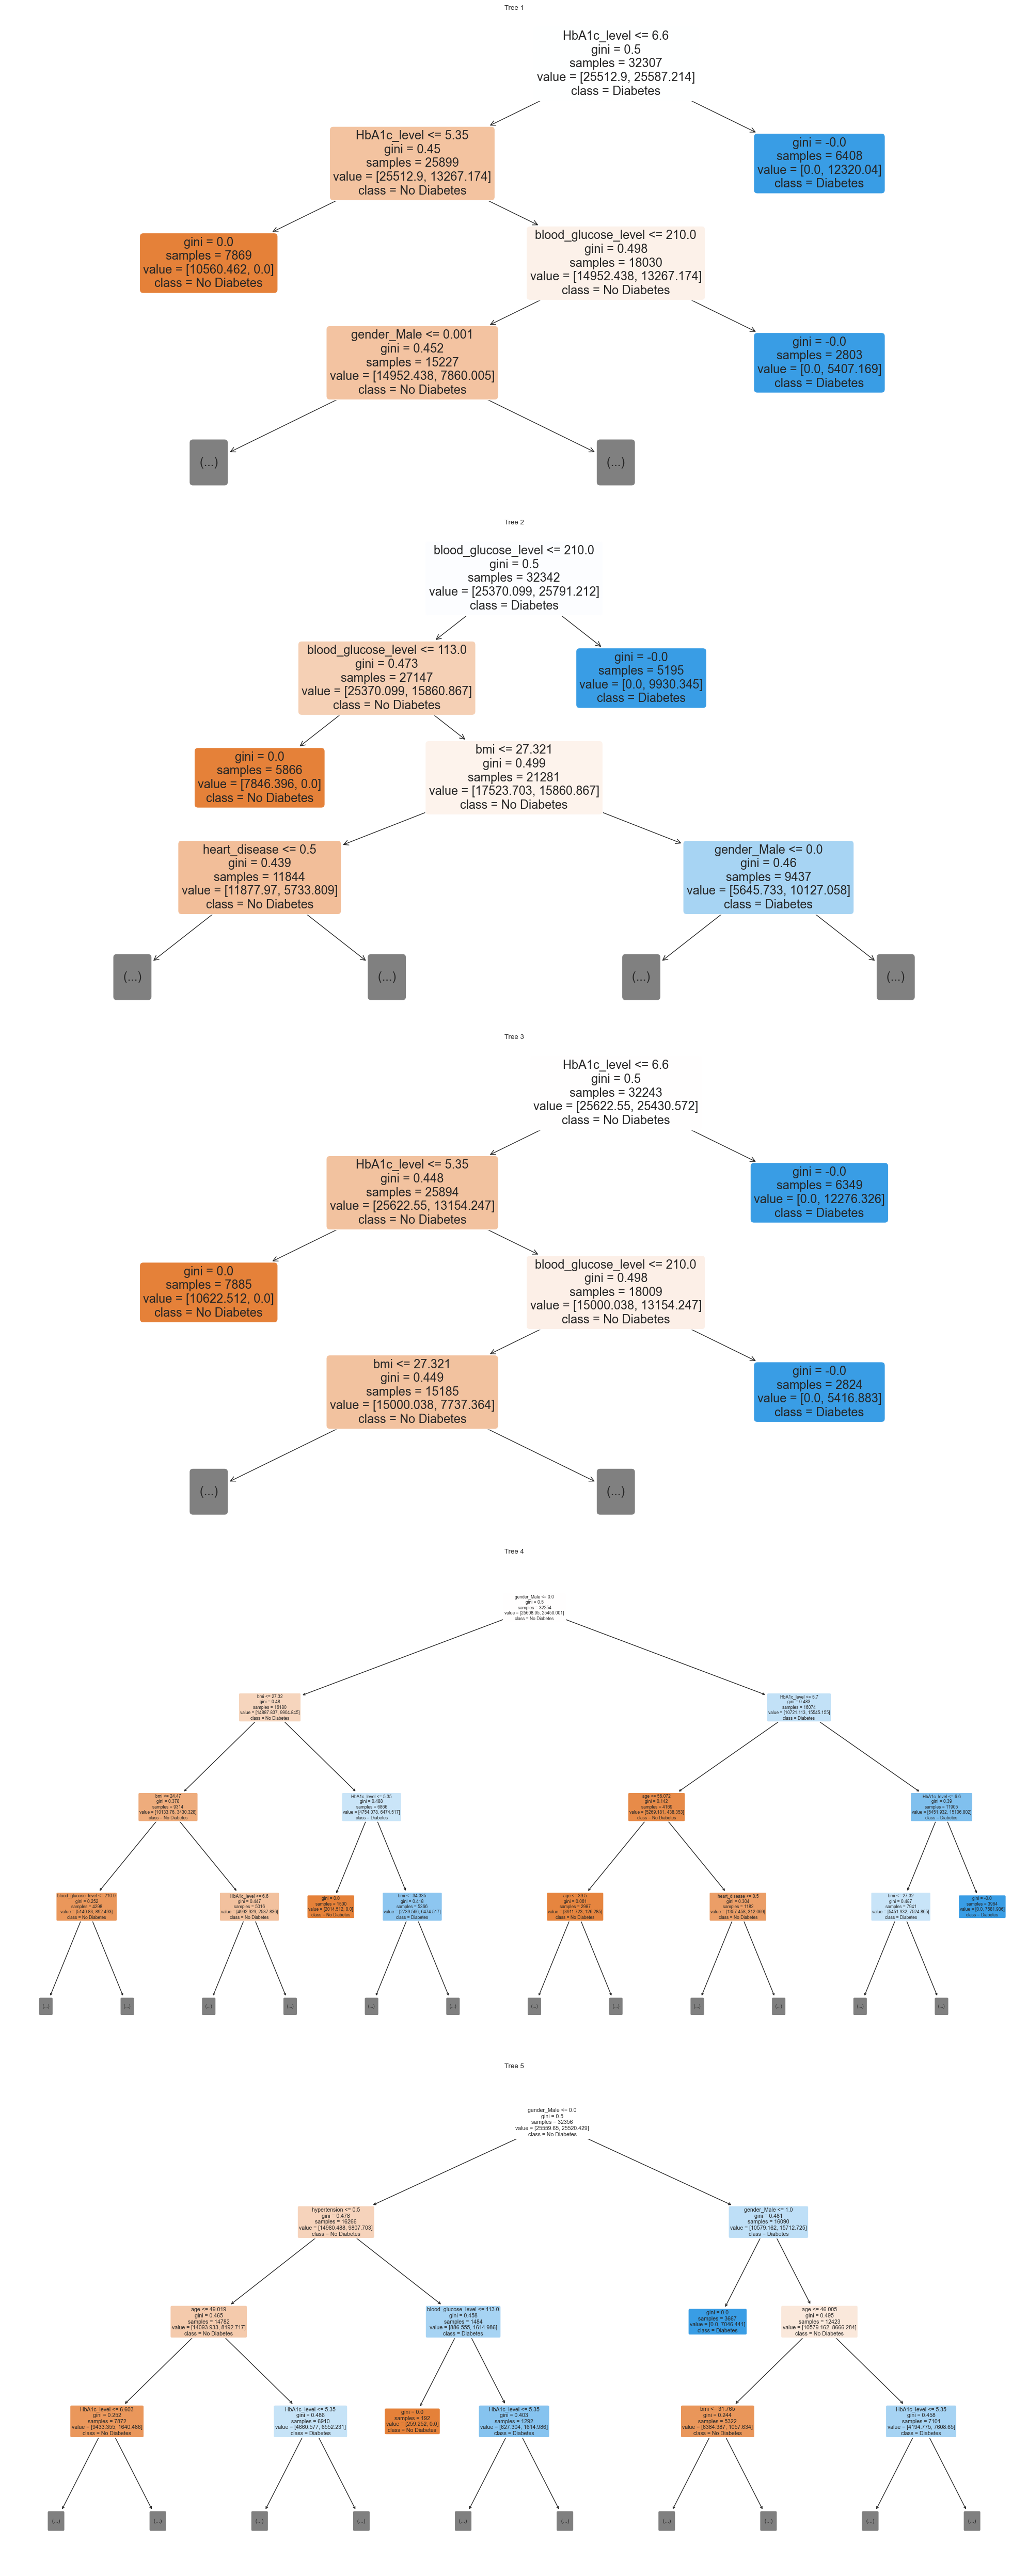

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, class_weight = 'balanced')
rf.fit(X_train_resampled, y_train_resampled)
y_train_pred = rf.predict(X_train_resampled)

plt.figure(figsize=(20, 50))
for i in range(5):
    plt.subplot(5, 1, i+1)
    plot_tree(rf.estimators_[i], 
             feature_names=X_train.columns,
             class_names=['No Diabetes', 'Diabetes'],  # Replace with your class names
             filled=True, 
             rounded=True,
             max_depth=3)  # Limit depth for readability
    plt.title(f"Tree {i+1}")
plt.tight_layout()
plt.show()

Train Data
Accuracy  :	 0.9986493628516061

TPR Train :	 0.9987164860239589
TNR Train :	 0.9986023759608665

FPR Train :	 0.001397624039133473
FNR Train :	 0.0012835139760410724


<Axes: >

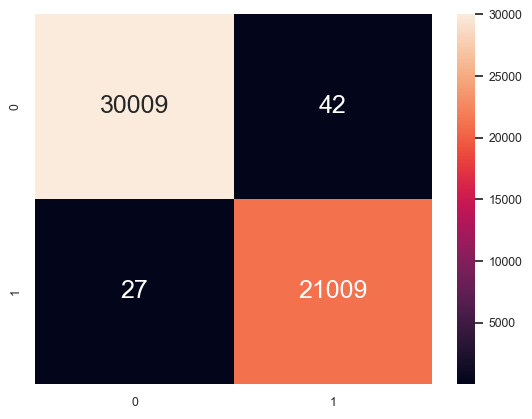

In [122]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rf.score(X_train_resampled, y_train_resampled))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train_resampled, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train_resampled, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [123]:
print("Precision :\t", precision_score(y_train_resampled, y_train_pred))
print("Recall    :\t", recall_score(y_train_resampled, y_train_pred))
print("F1 Score  :\t", f1_score(y_train_resampled, y_train_pred))

Precision :	 0.9980048453755166
Recall    :	 0.9987164860239589
F1 Score  :	 0.9983605388837409


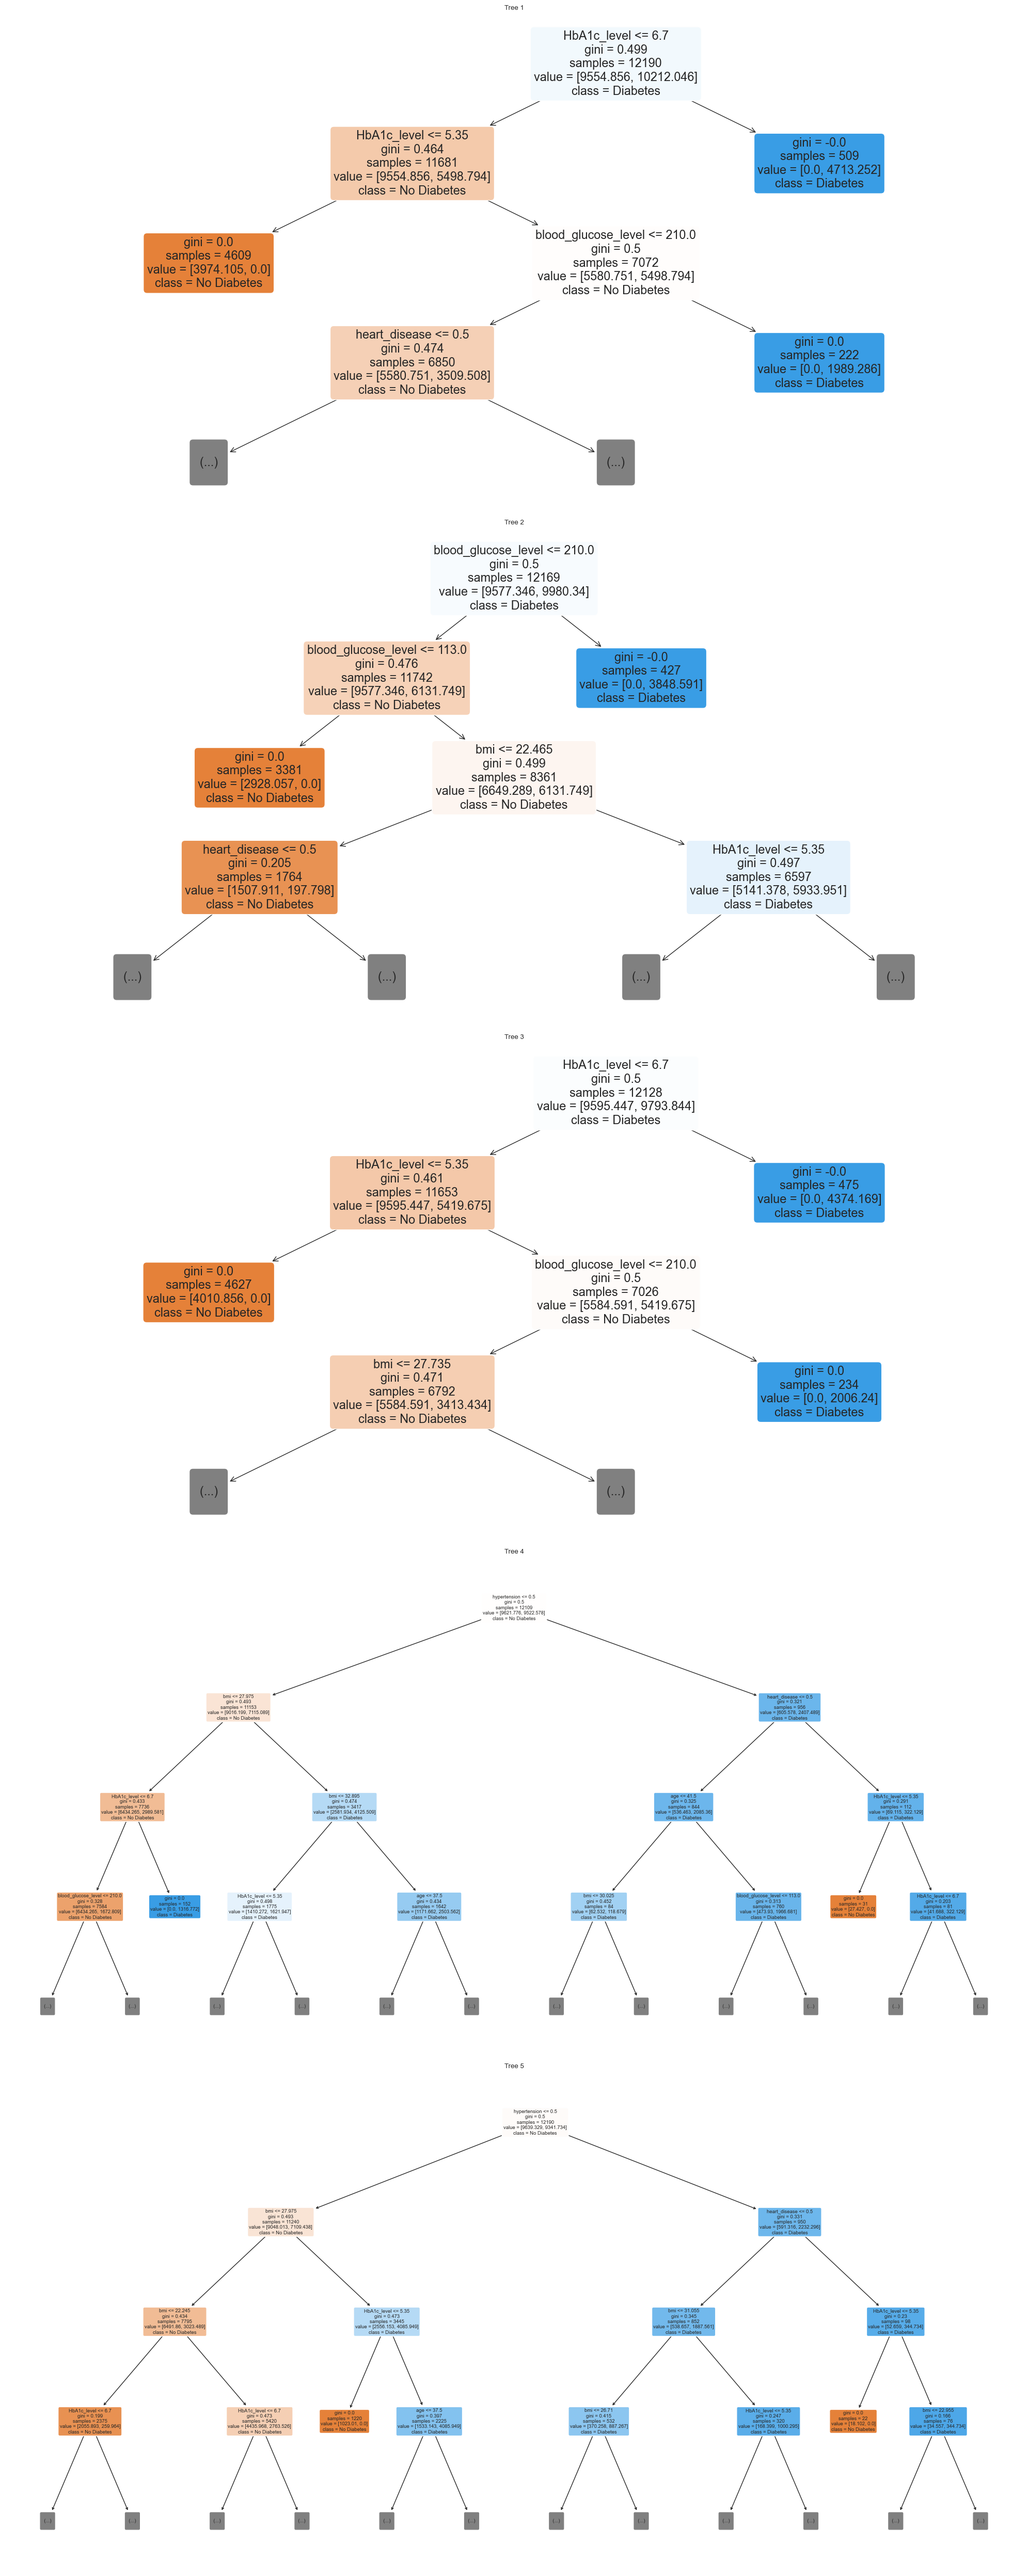

In [124]:
rf = RandomForestClassifier(random_state=42, class_weight = 'balanced')
rf.fit(X_test, y_test)
y_test_pred = rf.predict(X_test)

plt.figure(figsize=(20, 50))
for i in range(5):
    plt.subplot(5, 1, i+1)
    plot_tree(rf.estimators_[i], 
             feature_names=X_train.columns,
             class_names=['No Diabetes', 'Diabetes'],  # Replace with your class names
             filled=True, 
             rounded=True,
             max_depth=3)  # Limit depth for readability
    plt.title(f"Tree {i+1}")
plt.tight_layout()
plt.show()

Test Data
Accuracy  :	 0.999375845209612

TPR Test :	 0.9994121105232217
TNR Test :	 0.9993723252496434

FPR Test :	 0.0006276747503566334
FNR Test :	 0.0005878894767783657


<Axes: >

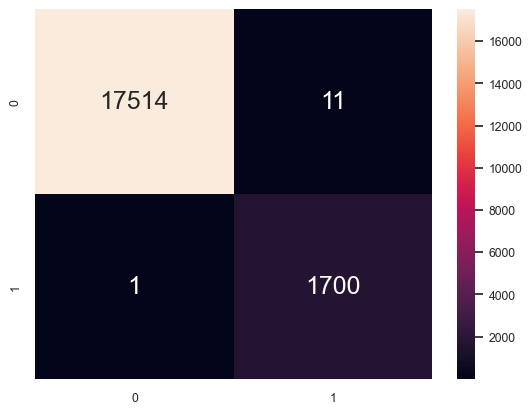

In [125]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rf.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [126]:
print("Precision :\t", precision_score(y_test, y_test_pred))
print("Recall    :\t", recall_score(y_test, y_test_pred))
print("F1 Score  :\t", f1_score(y_test, y_test_pred))

Precision :	 0.9935710111046172
Recall    :	 0.9994121105232217
F1 Score  :	 0.9964830011723329


### Creating a model: Attempt 3 -- Logistic regression (with default hyperparameters)

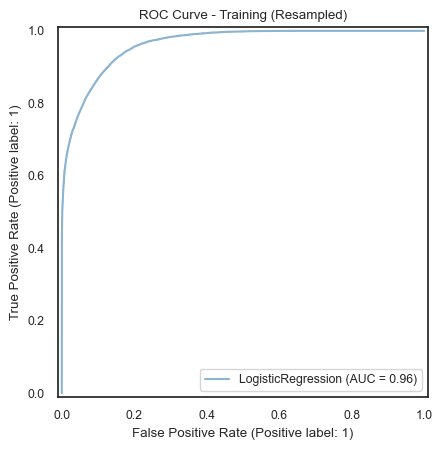

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report, RocCurveDisplay

# Initialize and train logistic regression
logreg = LogisticRegression(max_iter=1000, random_state=42, class_weight = 'balanced')
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_train = logreg.predict(X_train_resampled)

RocCurveDisplay.from_estimator(logreg, X_train_resampled, y_train_resampled)
plt.title("ROC Curve - Training (Resampled)")
plt.show()

Train Data
Accuracy  :	 0.886057118249261

TPR Train :	 0.8849591177029854
TNR Train :	 0.8868257295930252

FPR Train :	 0.11317427040697481
FNR Train :	 0.11504088229701465


<Axes: >

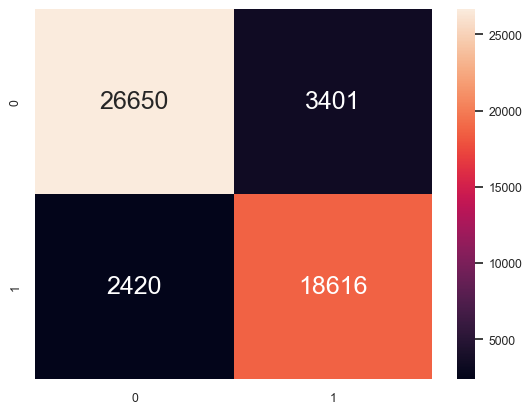

In [129]:
print("Train Data")
print("Accuracy  :\t", logreg.score(X_train_resampled, y_train_resampled))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train_resampled, y_pred_train)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train_resampled, y_pred_train), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [130]:
print("Precision :\t", precision_score(y_train_resampled, y_pred_train))
print("Recall    :\t", recall_score(y_train_resampled, y_pred_train))
print("F1 Score  :\t", f1_score(y_train_resampled, y_pred_train))

Precision :	 0.8455284552845529
Recall    :	 0.8849591177029854
F1 Score  :	 0.8647945555478131


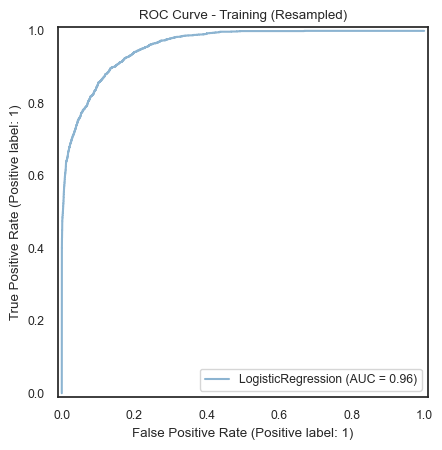

In [131]:
logreg = LogisticRegression(max_iter=1000, random_state=42,class_weight = 'balanced')
logreg.fit(X_test, y_test)
y_pred_test = logreg.predict(X_test)
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title("ROC Curve - Training (Resampled)")
plt.show()

Test Data
Accuracy  :	 0.8797461770519088

TPR Test :	 0.8794826572604351
TNR Test :	 0.8797717546362339

FPR Test :	 0.12022824536376604
FNR Test :	 0.12051734273956496


<Axes: >

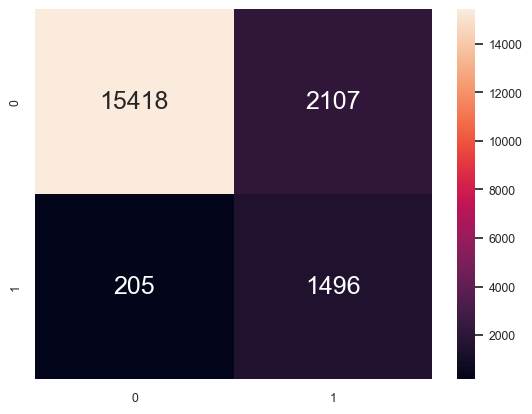

In [132]:
print("Test Data")
print("Accuracy  :\t", logreg.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_pred_test)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_pred_test), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [133]:
print("Precision :\t", precision_score(y_test, y_pred_test))
print("Recall    :\t", recall_score(y_test, y_pred_test))
print("F1 Score  :\t", f1_score(y_test, y_pred_test))

Precision :	 0.41520954759922285
Recall    :	 0.8794826572604351
F1 Score  :	 0.5641025641025641


### Creating a model: Attempt 4 -- RandomForest (with GridSearchCV)

#### **Hyperparameter Tuning: Focus on Random Forest**
After running our initial machine learning models using **default hyperparameters**, we compared the performance of three classifiers:

- Logistic Regression  
- Random Forest  
- Multivariate Decision Tree  

#### **Model Comparison (Before Tuning)**
Among the three, **Random Forest outperformed the others significantly**, showing near-perfect scores across multiple evaluation metrics:

Precision :	 0.9935710111046172
Recall    :	 0.9994121105232217
F1 Score  :	 0.9964830011723329

While these results were promising, they were **suspiciously high**, especially given the complexity and natural variability of real-world medical data. Such near-perfect performance often **raises a red flag**—potentially indicating overfitting, data leakage, or an overly simplified model scenario.

#### **Why We Tuned Only Random Forest**
Given that Random Forest showed the **most promising baseline results**, we focused our tuning efforts on this model. Tuning the other models with much lower performance metrics did not seem efficient or likely to yield better results than the already-strong Random Forest.

Furthermore, we wanted to test whether the **initial high performance** of Random Forest was due to a particularly lucky configuration of default parameters—or if we could improve its generalizability through tuning.

In [136]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                          param_grid=param_grid,
                          cv=5,  # 5-fold cross-validation
                          scoring='f1',  # Optimize for F1-score (good for imbalanced data)
                          n_jobs=-1,  # Use all CPU cores
                          verbose=2)  # Print progress

# Fit on training data 
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model
print("\nBest Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
print("\nBest rf:", best_rf)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Best rf: RandomForestClassifier(class_weight='balanced', max_depth=30,
                       min_samples_split=5, n_estimators=200, random_state=42)


#### **Interpretation of GridSearchCV Results**

The output from GridSearchCV shows the best combination of hyperparameters for our Random Forest model, selected from 216 candidates using 5-fold cross-validation (totaling 1080 fits). These optimized parameters aim to improve both model performance and generalizability:

- **`max_depth` of 30**: This limits the depth of each decision tree to 30 levels. A deeper tree allows the model to capture complex relationships in the data. In this case, the result suggests that a relatively deep model works well for our dataset, likely because it contains intricate patterns that require more levels to be properly captured — but not so deep as to overfit.

- **`max_features` set to `'sqrt'`**: At each split, the model considers a random subset of features equal to the square root of the total number of features. This is a common setting for classification problems and encourages diversity among trees in the forest, improving the robustness of the ensemble by reducing correlation between trees.

- **`min_samples_leaf` of 1**: This allows leaf nodes to contain a single sample. While this may increase the risk of overfitting slightly, it also gives the model flexibility to capture fine-grained patterns in the data. The other regularization parameters likely help balance this out.

- **`min_samples_split` of 5**: A node must have at least five samples to be split. This is a regularization strategy that prevents the model from making overly specific splits based on very small groups of data, thus reducing the likelihood of capturing noise.

- **`n_estimators` of 200**: The model uses an ensemble of 200 decision trees. A higher number of trees tends to increase model stability and reduce variance, as long as the computational cost is manageable. In this case, 200 estimators provided the best performance during validation.

---

Overall, the selected parameters represent a well-regularized yet flexible Random Forest model, capable of learning complex structures without overfitting. The use of `class_weight='balanced'` also helps address any class imbalance by giving more weight to underrepresented classes during training.

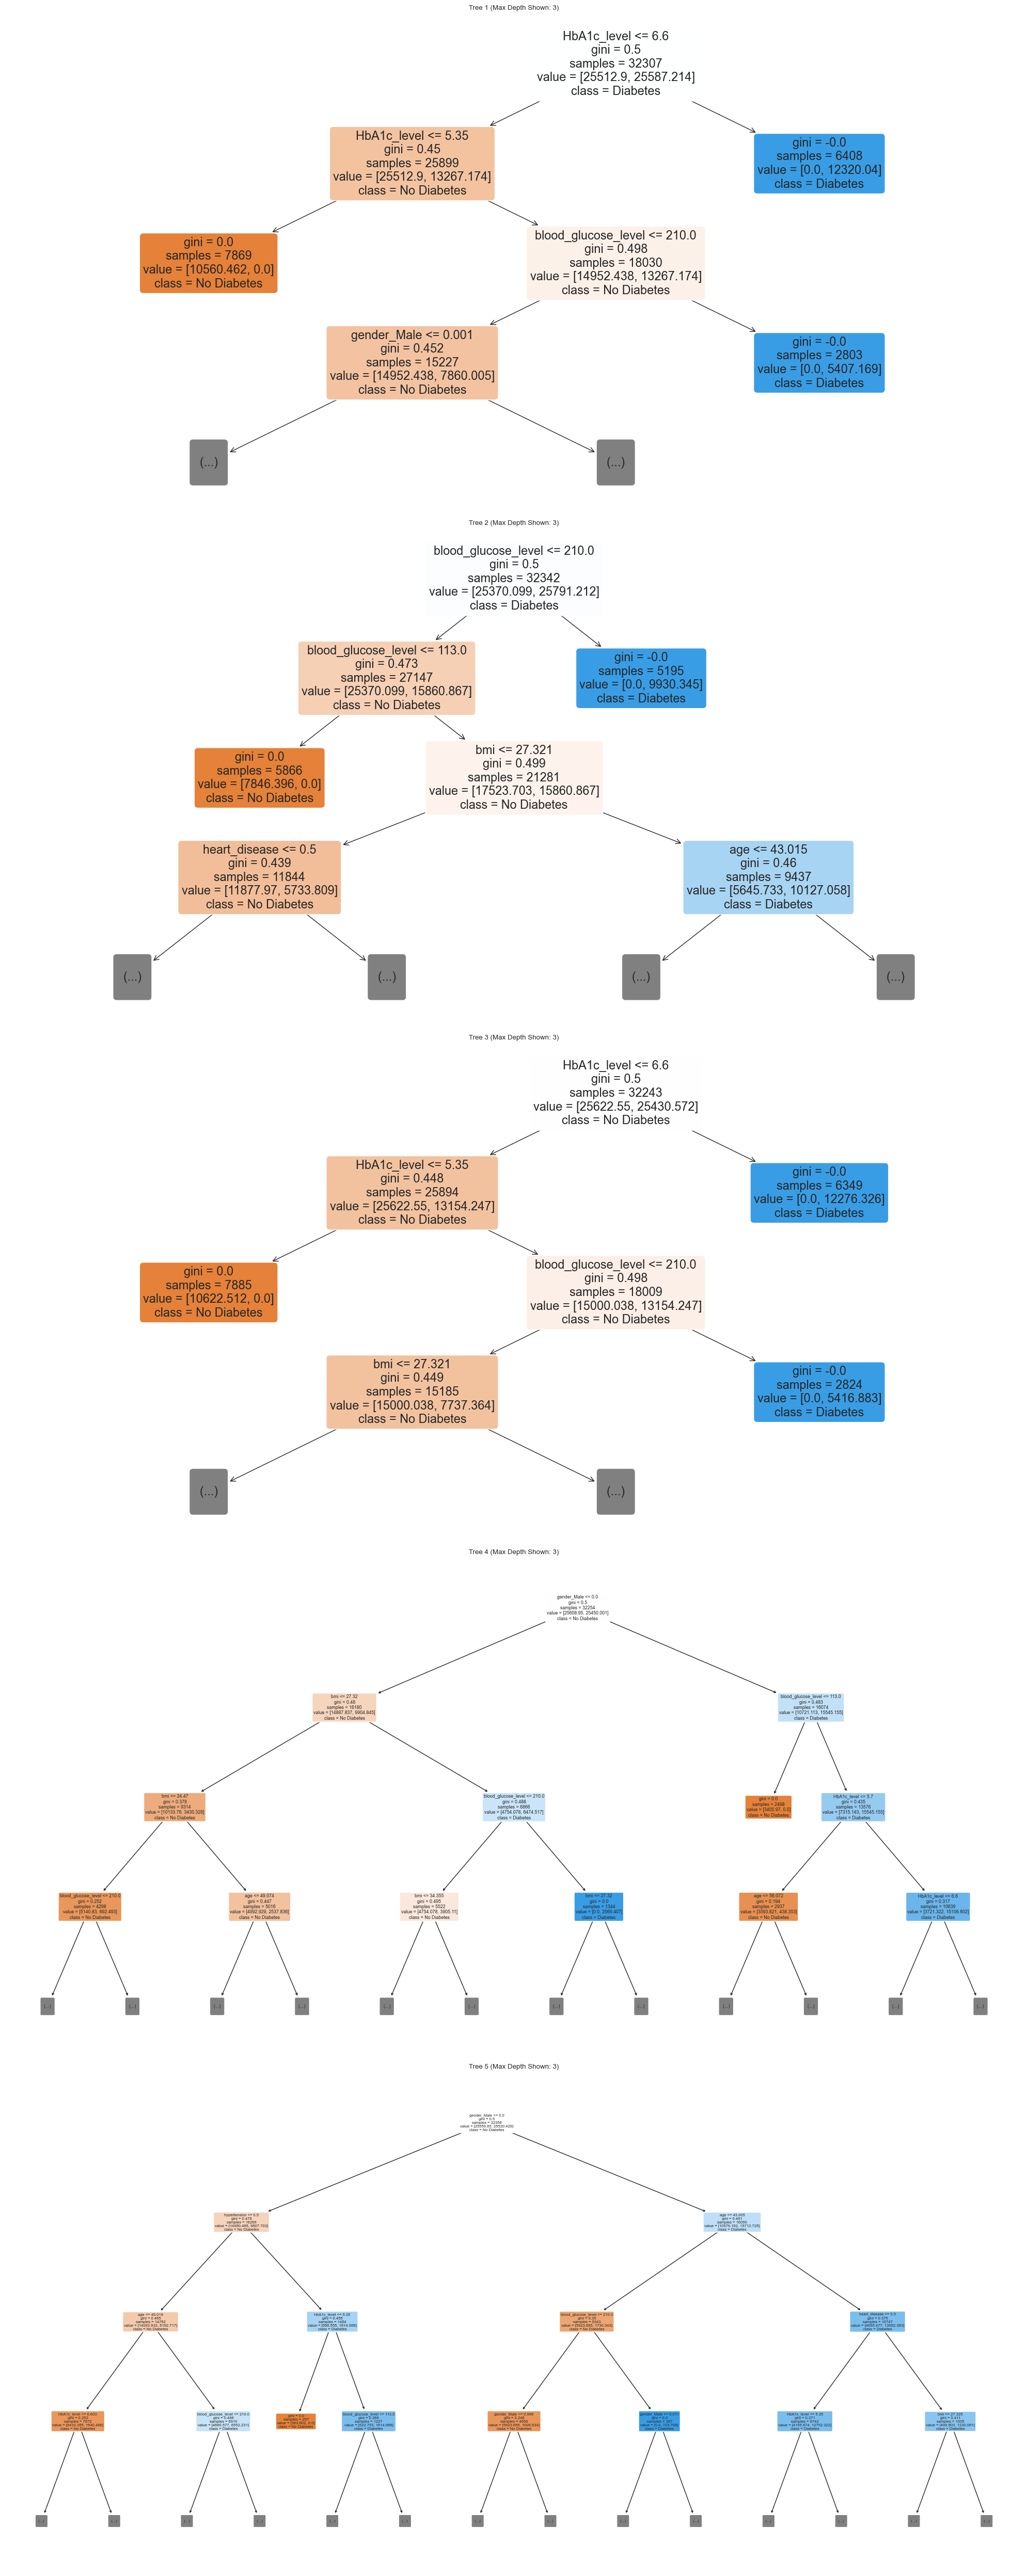

In [138]:
y_pred = best_rf.predict(X_test)
plt.figure(figsize=(20, 50))
for i in range(5):
    plt.subplot(5, 1, i+1)
    plot_tree(
        best_rf.estimators_[i],
        feature_names=X_train.columns,
        class_names=['No Diabetes', 'Diabetes'],  # Replace with your class names
        filled=True,
        rounded=True,
        max_depth=3  # Limit depth for readability
    )
    plt.title(f"Tree {i+1} (Max Depth Shown: 3)")
plt.tight_layout()
plt.show()

Test Data
Accuracy  :	 0.9465827525226256

TPR Test :	 0.7771898883009994
TNR Test :	 0.9630242510699002

FPR Test :	 0.036975748930099854
FNR Test :	 0.22281011169900058


<Axes: >

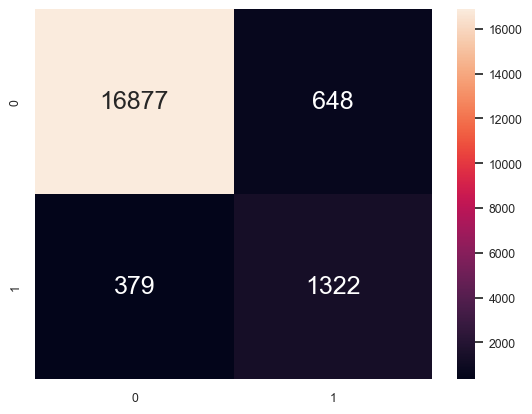

In [139]:
print("Test Data")
print("Accuracy  :\t", best_rf.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [140]:
print("Precision :\t", precision_score(y_test, y_pred))
print("Recall    :\t", recall_score(y_test, y_pred))
print("F1 Score  :\t", f1_score(y_test, y_pred))

Precision :	 0.6710659898477157
Recall    :	 0.7771898883009994
F1 Score  :	 0.7202397166984473


### **Result After Hyperparameter Tuning**

Following a rigorous **GridSearchCV** hyperparameter tuning process, we observed a **notable drop in performance** on the test set:

- Precision :	 0.6710659898477157
- Recall    :	 0.7771898883009994
- F1 Score  :	 0.7202397166984473

#### **Why did the performance drop?**
* **Effect of over optimistic resampling**  
    * Tuning was done on **resampled data**, it might have altered the distribution in a way that didn't align perfectly with the original test set, affecting performance. SMOTE may have created unrealisic synthetic samples
* **Class Weighing impact**
    * we used class_weight = "balanced' in tuning. This make the model prioritise minority class

#### **Summary**
* While the tuned model's performance may appear worse on paper, it likely reflects a **more honest estimate** of real-world capability. It sacrifices a bit of precision to avoid overconfidence


# Part 5: Ranking the Predictors
Ranking predictors is important because it reveals which features have the greatest influence on the model’s predictions. 
* enhances the interpretability of the model, allowing us to better understand how and why certain outcomes are being predicted.
* provides valuable insights into the underlying patterns in the data, guiding future research or policy decisions.

The features are ranked by their importance and visualized using a bar plot.


🔢 Feature Importance Ranking:
               Feature  Importance Score
0          HbA1c_level          0.383109
1  blood_glucose_level          0.267611
2                  age          0.190106
3                  bmi          0.093383
4          gender_Male          0.056875
5         hypertension          0.005745
6        heart_disease          0.003171


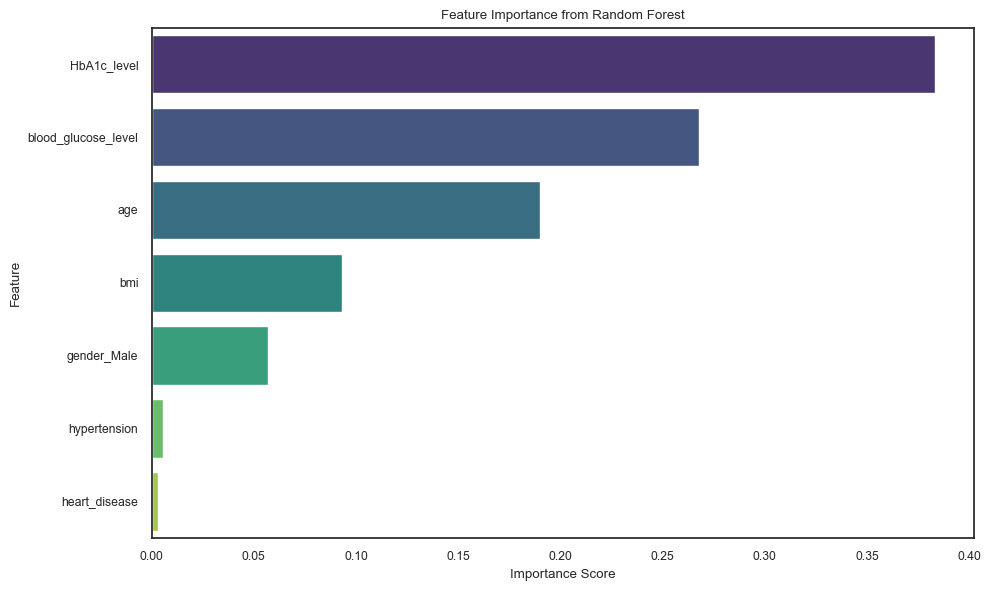

In [143]:
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy viewing and sorting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance Score': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance Score', ascending=False).reset_index(drop=True)

# Print ranking
print("\n🔢 Feature Importance Ranking:")
print(feature_importance_df)

# Optional: Plot it
plt.figure(figsize=(10, 6))
sb.barplot(
    data=feature_importance_df,
    x='Importance Score',
    y='Feature',
    hue='Feature',                # Add this
    dodge=False,                  # Optional, to keep it clean
    legend=False,                 # No need for a legend if y already shows features
    palette='viridis'            # Now it knows what to apply the palette to
)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Intepretation of result

* **HbA1c_level** is the most important feature with an importance score of 0.38. It reflects long-term blood glucose levels. Hence it is no wonder that it is a strong clinical indicator for diabetes diagnosis.

* **Blood_glucose_level** follows as the second most important feature with a score of 0.27. Since blood glucose levels are part of standard diagnostic criteria for diabetes, its strong influence on model predictions is expected and consistent with medical knowledge.

* **Age** is the third most important predictor, contributing 0.19 to the model. This aligns with well-established findings that the risk of type 2 diabetes increases with age, likely due to changes in metabolism and increased insulin resistance over time.

* **BMI** comes next with an importance of 0.09. While not as predictive as direct glucose-related measures, body mass index is a known risk factor for type 2 diabetes, especially in cases driven by obesity and lifestyle factors

* **Gender_Male** has a lower importance score of 0.06. This may suggest slight differences in diabetes prevalence or presentation between males and females in your dataset, but it does not appear to be a dominant predictive factor.

* **Hypertension** and **Heart_disease** show very low importance scores of 0.006 and 0.003, respectively. While both conditions are often associated with diabetes, particularly in older adults, they may not contribute unique predictive power beyond what age, HbA1c, and glucose levels already capture in the model.